In [242]:
import os
import pandas as pd
import numpy as np


# Molecule parser

In [243]:
# Define the project folder name
import sys
from pathlib import Path
project_name = "Chapter_DNA_Modelling"

#a Get the current directory
current_path = Path().resolve()

# Traverse up the directory structure until the project folder is found
for parent in current_path.parents:
    if parent.name == project_name:
        project_root = parent
        break
else:
    raise FileNotFoundError(f"Project folder '{project_name}' not found in any parent directory.")

# Add the project src directory to sys.path
# sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/exploration',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages',
 '/Users/ivanyankov/Documents/Chapter_DNA_Modelling',
 '/Users/ivanyankov/Documents/Chapter_DNA_Modelling']

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [245]:
cwd = project_root/'data/processed/'

In [246]:
df_mh=pd.read_csv('df_mh_with_features.csv')
df_mh=df_mh.drop(columns='Unnamed: 0')
df_mh

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1,Length,Count_G,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,25.85,gagggaCagaaagctccctCtctttc.cml,mismatch,gagggSSSgaaag,mismatch,6.8,gagggacagaaag,gagggacagaaag,13,6,...,1280,834,102,1256,534,483,79,914,1021,1132
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga,20,6,...,1916,1374,169,2466,588,795,135,2149,1865,1874
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc,13,1,...,1280,834,102,1312,539,483,79,973,1043,1132
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt,26,4,...,2282,1861,240,3694,190,1064,182,3513,2686,2505
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag,13,6,...,1262,828,99,1358,444,484,79,1072,1072,1144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt,25,0,...,2464,1790,229,3102,967,1027,175,2260,2285,2409
65,53.29,69_t26_gxttg_imi-quin_imi-quin.cml,chemically_modified,tttgtttgtStgSSSgtStttttttt,X=imi-quin,6.8,tttgtttgtttgtttgtttttttttt,tttgtttgtttgxttgtttttttttt,26,4,...,2223,1449,177,3526,246,825,158,3149,2628,1958
66,28.97,84_1_3DA_t.cml,chemically_modified,gagggSSSgaaag,X = 1_3DA,6.8,gagggaaagaaag,gagggaxagaaag,13,6,...,1688,599,71,931,406,348,55,665,763,821
67,20.83,98_C-Im_C-Im.cml,chemically_modified,gagggSSSgaaag,X = C-Im,6.8,gagggtatgaaag,gagggtxtgaaag,13,6,...,1152,422,40,1074,464,242,55,710,923,580


In [247]:
df_lz=pd.read_csv('df_lz_with_features.csv')
df_lz=df_lz.drop(columns='Unnamed: 0')
df_lz

,Tm,DNA,Length,Count_G,Count_A,Count_C,Count_T,Count_X,Count_Y,C_sugar-C_sugar,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
0,16.9,aaaaaaaa,8,0,8,0,0,0,0,369,...,0,0,0,0,0,0,0,0,0,0
1,27.9,aaaaaaaaa,9,0,9,0,0,0,0,369,...,0,0,0,0,0,0,0,0,0,0
2,32.0,aaaaaaaaaa,10,0,10,0,0,0,0,499,...,0,0,0,0,0,0,0,0,0,0
3,35.7,aactggac,8,2,3,2,1,0,0,367,...,0,0,0,0,0,0,0,0,0,0
4,37.0,aagcgtag,8,3,3,1,1,0,0,363,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,ttcattcc,8,0,1,3,4,0,0,362,...,0,0,0,0,0,0,0,0,0,0
301,32.9,ttctggac,8,2,1,2,3,0,0,367,...,0,0,0,0,0,0,0,0,0,0
302,69.2,ttgaagatacgctggc,16,5,4,3,4,0,0,870,...,0,0,0,0,0,0,0,0,0,0
303,35.8,ttgtggac,8,3,1,1,3,0,0,365,...,0,0,0,0,0,0,0,0,0,0


# Feature correlation with Tm

In [248]:
# Assuming 'Tm' is the column name in your DataFrame
numeric_columns = df_mh.select_dtypes(include=['number']).columns

# for col in numeric_columns:
#     if col != 'Tm':  # Exclude 'Tm' itself from being plotted against 'Tm'
#         plt.figure()
#         plt.scatter(df_mh['Tm'], df_mh[col])
#         plt.title(f'Tm vs {col}')
#         plt.xlabel('Tm')
#         plt.ylabel(col)
#         plt.show()

In [249]:
correlation_results = {}

for col in df_mh.select_dtypes(include=['number']).columns:
    if 'Tm' in df_mh.columns:
        correlation = df_mh['Tm'].corr(df_mh[col])
        correlation_results[col] = correlation

# Convert the results to a DataFrame for easier visualization
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Property', 'Correlation with Tm'])
# correlation_df

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


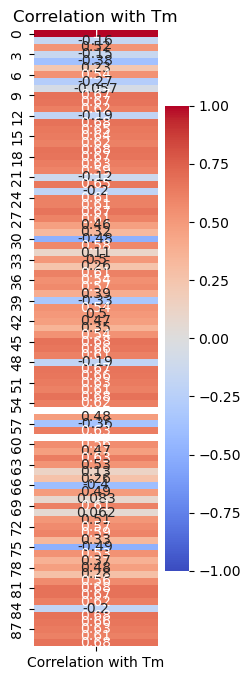

In [250]:
# correlation_matrix = df_desc.corr()
# tm_correlation = correlation_matrix[['Tm']]
plt.figure(figsize=(2, 8))
sns.heatmap(correlation_df[['Correlation with Tm']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Tm')
plt.savefig('corr_heatmap_of_DNA_score_desc_2.png')
plt.show()

# MLExperiments

## K-FoldMHdataset

In [251]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def train_and_evaluate_model(X, y, df_type, model=None, n_splits=5, random_state=42):
    """
    Train and evaluate a model using k-fold cross-validation.

    Parameters:
    X (pd.DataFrame): Feature data.
    y (pd.Series): Target data.
    df_type (pd.DataFrame): DataFrame containing additional columns, including the index.
    model (sklearn model, optional): Model to be trained. Defaults to RandomForestRegressor.
    n_splits (int): Number of folds for cross-validation. Defaults to 5.
    random_state (int): Random state for reproducibility. Defaults to 42.

    Returns:
    dict: A dictionary containing predictions, actuals, index_list, and evaluation metrics.
    """
    
    if model is None:
        model = RandomForestRegressor()

    # Define k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Lists to store predictions, actuals, and their corresponding indices
    predictions = []
    actuals = []
    index_list = []

    bias_list = []
    mae_list = []
    r2_list = []
    mse_list = []
    rmse_list = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_val_pred = model.predict(X_val)
        predictions.extend(y_val_pred)
        actuals.extend(y_val)
        index_list.extend(df_type.iloc[val_index].index)

        # Calculate metrics
        bias = np.mean(np.array(y_val_pred) - np.array(y_val))
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)

        # Store metrics
        bias_list.append(bias)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)

    # Return a dictionary of results
    return {
        'predictions': predictions,
        'actuals': actuals,
        'index_list': index_list,
        'bias_list': bias_list,
        'mae_list': mae_list,
        'mse_list': mse_list,
        'rmse_list': rmse_list,
        'r2_list': r2_list
    }

# Example usage:
# results = train_and_evaluate_model(X2, y2, df_type)


In [252]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
def train_and_evaluate_model(X, y, df_type, model=None, param_grid=None, n_splits=5, random_state=42):
    """
    Train and evaluate a model using k-fold cross-validation with hyperparameter tuning.

    Parameters:
    X (pd.DataFrame): Feature data.
    y (pd.Series): Target data.
    df_type (pd.DataFrame): DataFrame containing additional columns, including the index.
    model (sklearn model, optional): Model to be trained. Defaults to RandomForestRegressor.
    param_grid (dict, optional): Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values.
    n_splits (int): Number of folds for cross-validation. Defaults to 5.
    random_state (int): Random state for reproducibility. Defaults to 42.

    Returns:
    dict: A dictionary containing predictions, actuals, index_list, and evaluation metrics.
    """
    
    if model is None:
        model = RandomForestRegressor()

    # Define k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Lists to store predictions, actuals, and their corresponding indices
    predictions = []
    actuals = []
    index_list = []

    bias_list = []
    mae_list = []
    r2_list = []
    mse_list = []
    rmse_list = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

         # Perform hyperparameter tuning if param_grid is provided
        if param_grid:
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, n_jobs=1, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            print(f"Best parameters found: {grid_search.best_params_}")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_val_pred = model.predict(X_val)
        predictions.extend(y_val_pred)
        actuals.extend(y_val)
        index_list.extend(df_type.iloc[val_index].index)

        # Calculate metrics
        bias = np.mean(np.array(y_val_pred) - np.array(y_val))
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)

        # Store metrics
        bias_list.append(bias)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)

    # Return a dictionary of results
    return {
        'predictions': predictions,
        'actuals': actuals,
        'index_list': index_list,
        'bias_list': bias_list,
        'mae_list': mae_list,
        'mse_list': mse_list,
        'rmse_list': rmse_list,
        'r2_list': r2_list
    }

In [257]:
def plot_predictions_and_metrics(results, df_type, name_col='type', error_threshold=10, save_plots=True, second_plot=True, save_name='test.png',title='k-fold HB Actual vs Predicted Values'):
    """
    Plot actual vs predicted values and error plots, and compute metrics.

    Parameters:
    results (dict): Dictionary containing predictions, actuals, index_list, and evaluation metrics.
    df_type (pd.DataFrame): DataFrame containing additional columns, including the index.
    name_col (str): Column name to use for color coding the plot. Defaults to 'type'.
    error_threshold (float): Threshold for annotating points with large errors. Defaults to 10.
    save_plots (bool): Whether to save plots as images. Defaults to True.

    Returns:
    dict: A dictionary containing the average and standard deviation of bias, MAE, MSE, RMSE, and R².
    """

    predictions = results['predictions']
    actuals = results['actuals']
    index_list = results['index_list']
    bias_list = results['bias_list']
    mae_list = results['mae_list']
    mse_list = results['mse_list']
    rmse_list = results['rmse_list']
    r2_list = results['r2_list']

    unique_types = df_type[name_col].unique()
    cmap = plt.get_cmap('tab20', len(unique_types))
    color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

    # Assign colors based on type
    colors = df_type[name_col].map(color_mapping)

    # Determine the limits for the axes to ensure they are the same
    min_limit = min(min(actuals), min(predictions))
    max_limit = max(max(actuals), max(predictions))

    # Plot Actual vs Predicted values
    plt.figure(figsize=(8, 8))  # Make the figure square
    for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
        color = colors[idx]  # Use the original DataFrame index for color
        plt.scatter(actual, pred, color=color)
        if abs(actual - pred) > error_threshold:
            nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
            pH = f"{df_type['pH'].loc[idx]}"
            plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

    plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

    
    # Set the same limits for x and y axes
    plt.xlim(min_limit, max_limit)
    plt.ylim(min_limit, max_limit)

    # Custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
    labels = [f'Type {t}' for t in unique_types]
    plt.legend(handles, labels, loc='lower right')

    plt.xlabel(f'Actual Values / {chr(176)} "C"')
    plt.ylabel(f'Predicted Values / {chr(176)} "C"')
    plt.title(f'{title}')
    plt.grid(True)
    
    # Ensure the plot is square
    plt.gca().set_aspect('equal', adjustable='box')

    # Compute and display metrics
    bias = np.mean(bias_list)
    mae = np.mean(mae_list)
    mse = np.mean(mse_list)
    rmse = np.mean(rmse_list)
    r2 = np.mean(r2_list)

    sd_bias = np.std(bias_list)
    sd_mae = np.std(mae_list)
    sd_mse = np.std(mse_list)
    sd_rmse = np.std(rmse_list)
    sd_r2 = np.std(r2_list)

    plus_minus = "\u00B1"
    textstr = '\n'.join((
        f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
        f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
        f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
        f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
        f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)


    if save_plots:
        plt.savefig(f'{save_name}.png')
    plt.show()
    
    if second_plot == True:
            
        # Plot Prediction Errors
        errors = np.array(predictions) - np.array(actuals)
        plt.figure(figsize=(10, 6))

        for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
            color = colors[idx]
            plt.scatter(actual, error, color=color)
            if np.abs(error) > error_threshold:
                nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
                pH = f"{df_type['pH'].loc[idx]}"
                plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, error), textcoords="offset points", xytext=(5, 5), ha='center')

        plt.axhline(y=0, color='red', linewidth=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Prediction Error')
        plt.title('k-fold HB Prediction Error vs Actual Values')
        plt.grid(True)
        
        if save_plots:
            plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_error_in_actual_value.png')
        plt.show()

    return {
        'mean_bias': bias,
        'mean_mae': mae,
        'mean_mse': mse,
        'mean_rmse': rmse,
        'mean_r2': r2,
        'std_bias': sd_bias,
        'std_mae': sd_mae,
        'std_mse': sd_mse,
        'std_rmse': sd_rmse,
        'std_r2': sd_r2
    }

### RF Score with Param_grid, on HB all types

In [253]:
df_lz_without_H = df_lz.drop(columns=[col for col in df_lz.columns if 'H_' in col])
df_mh_without_H = df_mh.drop(columns=[col for col in df_mh.columns if 'H_' in col])
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_mh_without_H_natural = df_mh_without_H[df_mh_without_H['type'].str.contains('natural', case=False, na=False)]
# df_mh_without_H_natural
df_mh_without_H.columns

Index(['Tm', 'Avogadro_file_name', 'type', 'Consensuc sequence',
       'Nucleotide shorthand', 'pH', 'w3DNA', 'DNA_conv1', 'Length', 'Count_G',
       'Count_A', 'Count_C', 'Count_T', 'Count_X', 'Count_Y',
       'C_sugar-C_sugar', 'C_sugar-O_backbone', 'C_sugar-C_nucleobase',
       'C_sugar-O_nucleobase', 'C_sugar-O_sugar', 'C_sugar-P_backbone',
       'C_sugar-N_nucleobase', 'O_backbone-C_sugar', 'O_backbone-O_backbone',
       'O_backbone-C_nucleobase', 'O_backbone-O_nucleobase',
       'O_backbone-O_sugar', 'O_backbone-P_backbone',
       'O_backbone-N_nucleobase', 'C_nucleobase-C_sugar',
       'C_nucleobase-O_backbone', 'C_nucleobase-C_nucleobase',
       'C_nucleobase-O_nucleobase', 'C_nucleobase-O_sugar',
       'C_nucleobase-P_backbone', 'C_nucleobase-N_nucleobase',
       'O_nucleobase-C_sugar', 'O_nucleobase-O_backbone',
       'O_nucleobase-C_nucleobase', 'O_nucleobase-O_nucleobase',
       'O_nucleobase-O_sugar', 'O_nucleobase-P_backbone',
       'O_nucleobase-N_nucleoba

In [271]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

X2 = df_mh_without_H[df_mh_without_H.columns[15:]]
y2 = df_mh_without_H['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model(X2, y2, df_type=df_mh, model=model, param_grid=param_grid)
# metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')


Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


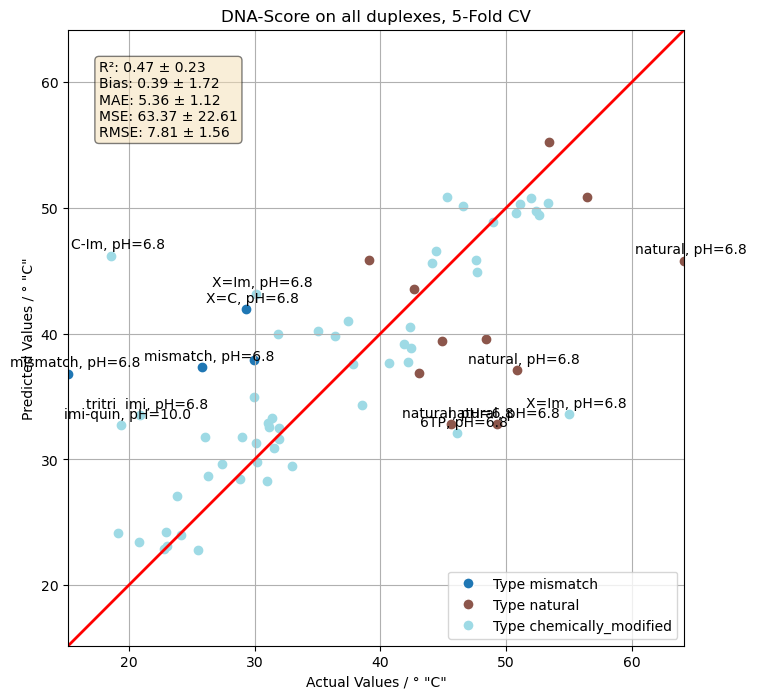

In [272]:
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='5fold_HB_without_H_grid_search_HB_ALL',title='DNA-Score on all duplexes, 5-Fold CV')

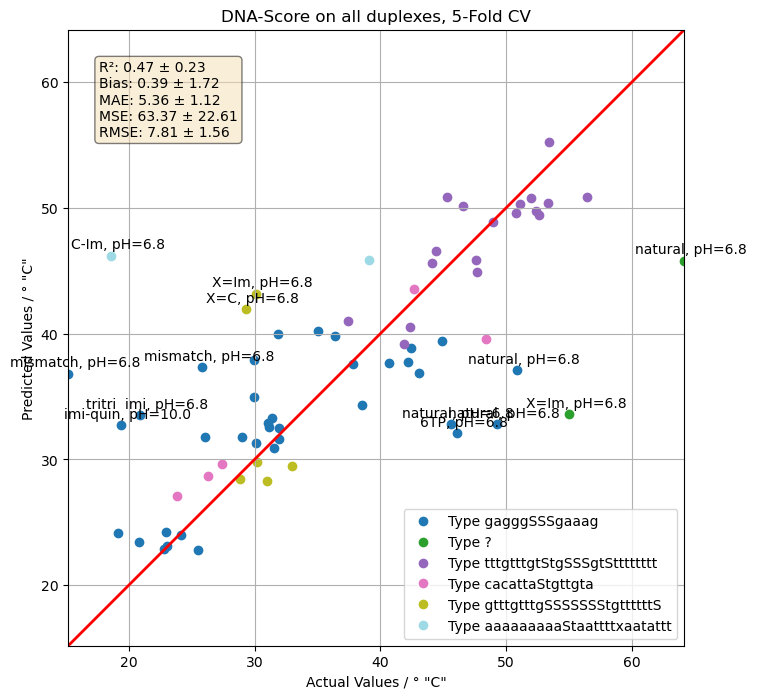

In [273]:
metrics = plot_predictions_and_metrics(results, df_mh, name_col='Consensuc sequence', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='5fold_HB_without_H_grid_search_HB_All__legend_consensus_sequence',title='DNA-Score on all duplexes, 5-Fold CV')

Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


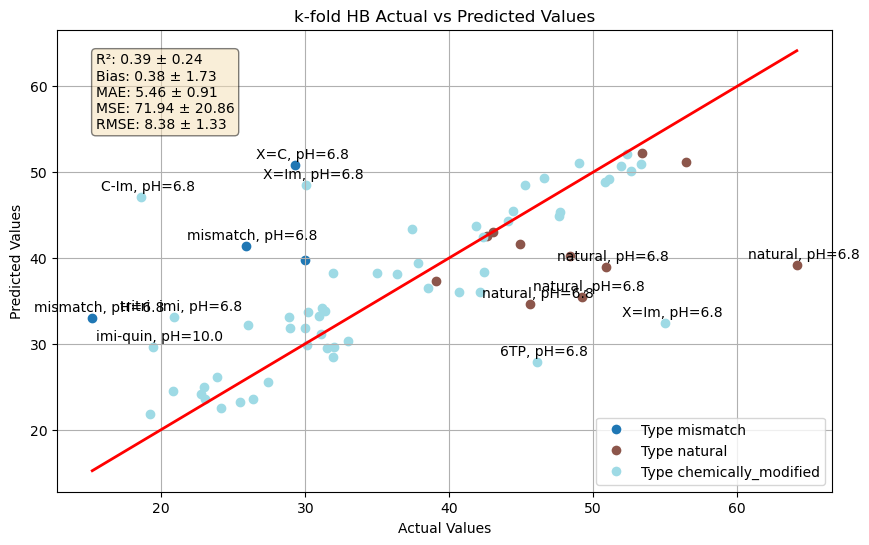

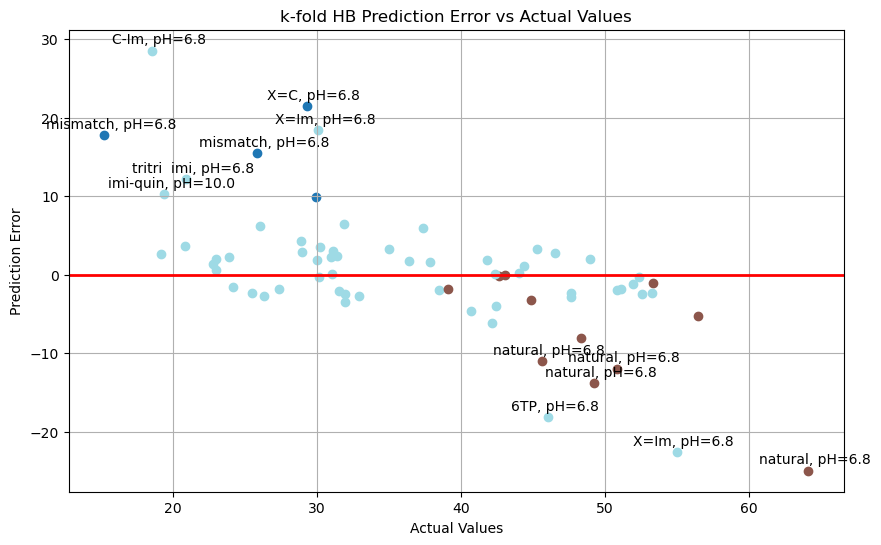

In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

X2 = df_mh[filtered_columns]
y2 = df_mh['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model(X2, y2, df_type=df_mh, model=model, param_grid=param_grid)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

### Linear regression model, on Natural with Features Stats

In [43]:
from sklearn.linear_model import LinearRegression

In [49]:
df_natural.columns[8:12]
df_natural

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1,Length,Count_G,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga,20,6,...,1916,1374,169,2466,588,795,135,2149,1865,1874
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc,13,1,...,1280,834,102,1312,539,483,79,973,1043,1132
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt,26,4,...,2282,1861,240,3694,190,1064,182,3513,2686,2505
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag,13,6,...,1262,828,99,1358,444,484,79,1072,1072,1144
5,42.65,cacattaatgttgta.cml,natural,cacattaStgttgta,natural,10.0,cacattaatgttgta,cacattaatgttgta,15,2,...,1373,990,116,1881,386,571,95,1611,1417,1360
59,43.06,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggaaagaaag,gagggaaagaaag,13,6,...,1310,829,102,1270,564,484,79,879,1019,1135
60,45.64,gagggagagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggagagaaag,gagggagagaaag,13,7,...,1309,827,101,1254,533,484,79,912,1016,1131
62,50.87,gagggtgtgaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggtgtgaaag,gagggtgtgaaag,13,7,...,1261,823,99,1342,414,482,79,1104,1060,1141
63,48.36,cacattagtgttgta.cml,natural,cacattaStgttgta,natural,6.8,cacattagtgttgta,cacattagtgttgta,15,3,...,1373,989,116,1865,354,570,95,1644,1427,1356
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt,25,0,...,2464,1790,229,3102,967,1027,175,2260,2285,2409


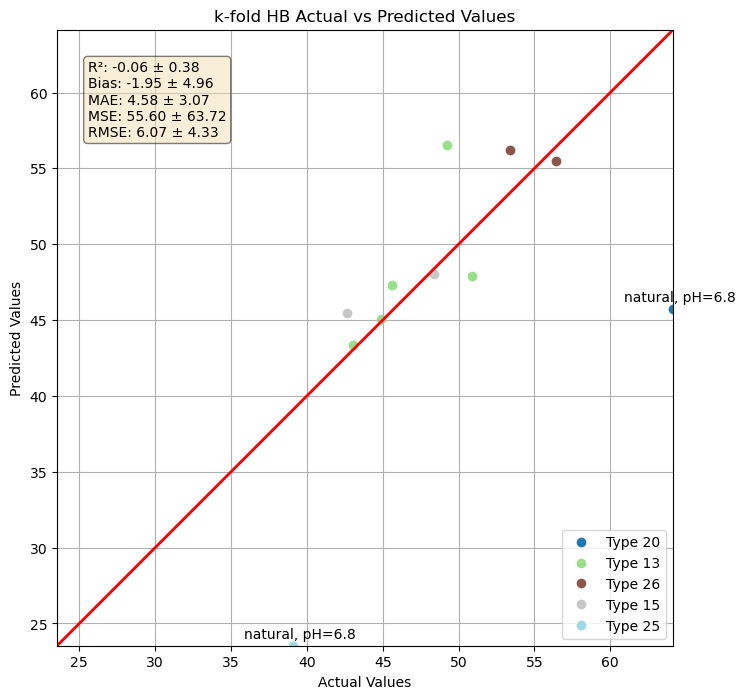

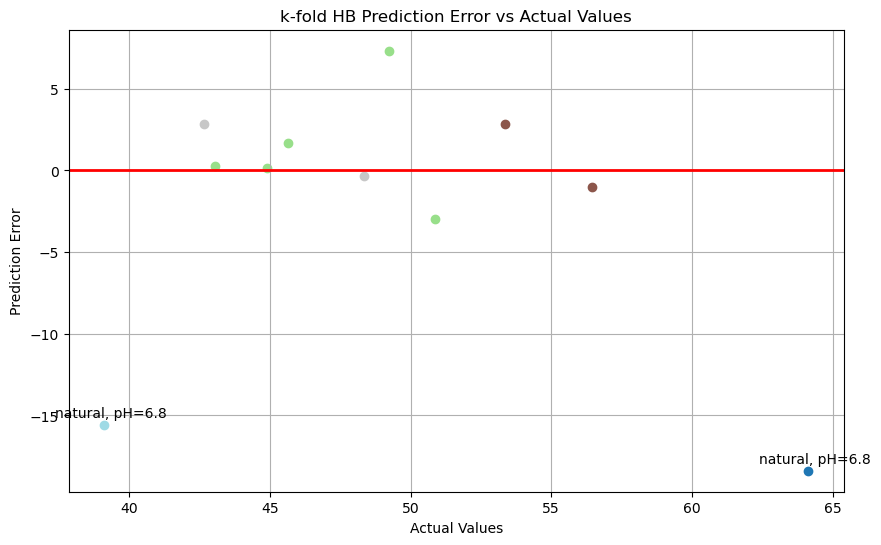

In [57]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]

# Now use the filtered DataFrame for further analysis
X2 = df_natural[df_natural.columns[8:13]]
y2 = df_natural['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_natural, model=model,n_splits=3)
metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length')

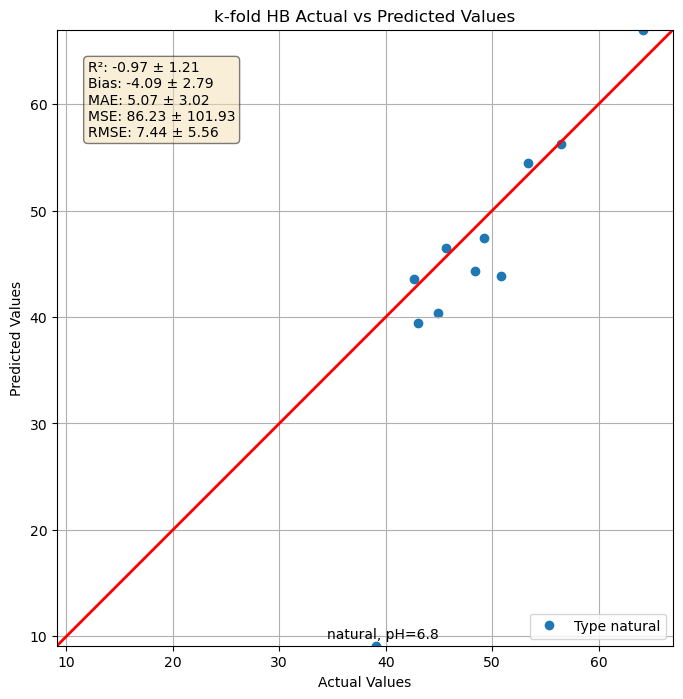

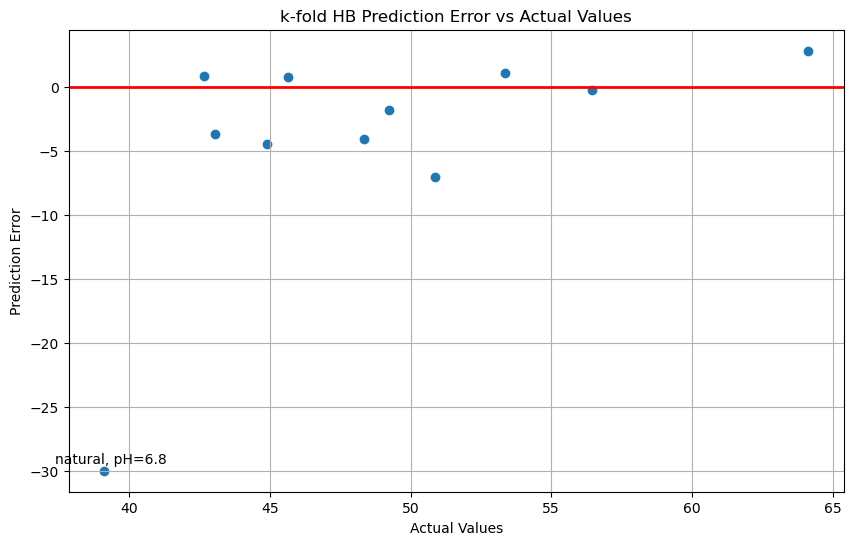

In [58]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]

# Now use the filtered DataFrame for further analysis
X2 = df_natural[filtered_columns]
y2 = df_natural['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_natural, model=model,n_splits=3)
metrics = plot_predictions_and_metrics(results, df_natural, name_col='type')

### Remove 2 outlinesr Length 20 and 25

In [129]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]


# Now use the filtered DataFrame for further analysis
X2 = df_natural[df_natural.columns[8:13]]
y2 = df_natural['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_natural, model=model, n_splits=3)



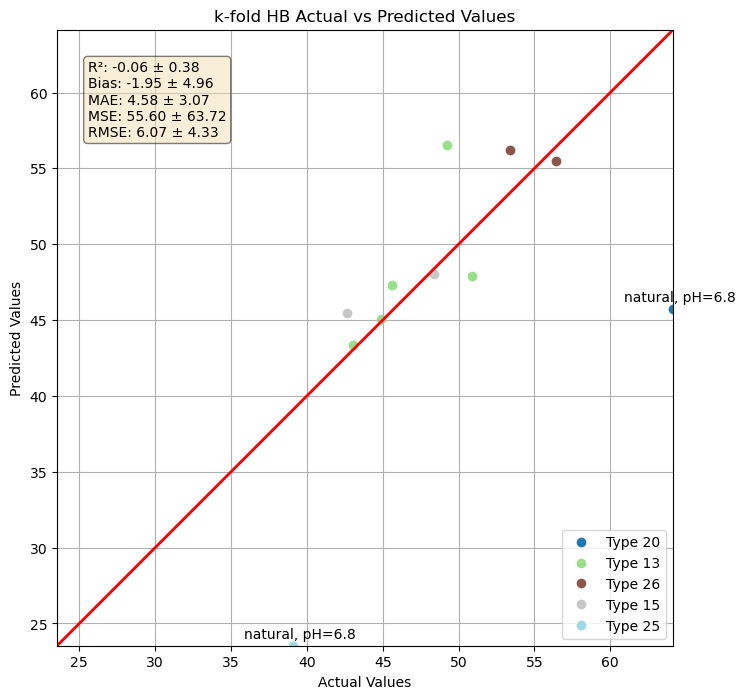

In [137]:

metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length',second_plot=False)

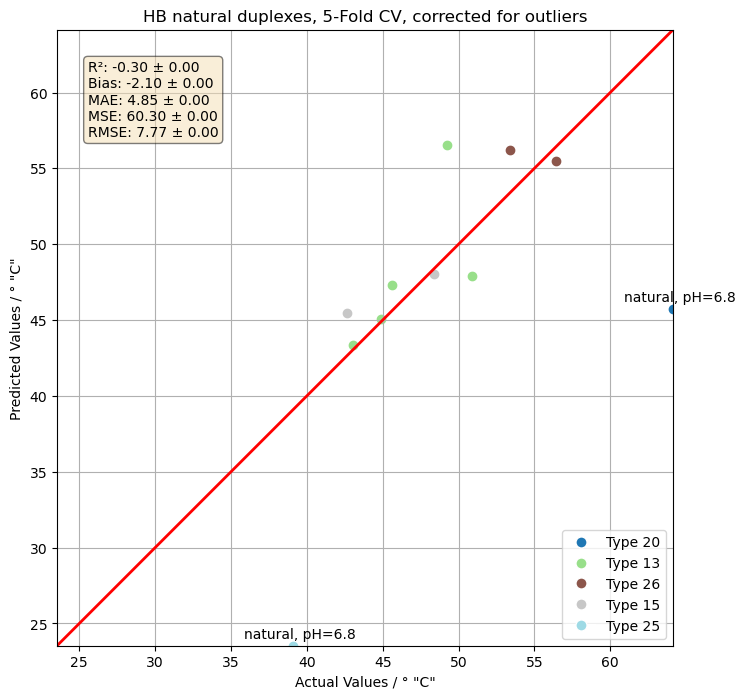

In [284]:
# Convert lists to numpy arrays for easier calculations
filtered_predictions = np.array(results['predictions'])
filtered_actuals = np.array(results['actuals'])

# Recalculate statistics
bias = np.mean(filtered_predictions - filtered_actuals)
mae = mean_absolute_error(filtered_actuals, filtered_predictions)
mse = mean_squared_error(filtered_actuals, filtered_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(filtered_actuals, filtered_predictions)

# Update the filtered_results dictionary
results['bias_list'] = [bias]
results['mae_list'] = [mae]
results['mse_list'] = [mse]
results['rmse_list'] = [rmse]
results['r2_list'] = [r2]

# metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length',second_plot=False)
metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='test_correction',title='HB natural duplexes, 5-Fold CV, corrected for outliers')

In [285]:
# Assuming df_natural has been filtered as described earlier
# Identify the indexes where 'Length' is 20 or 25
indexes_to_drop = df_natural[df_natural['Length'].isin([20, 25])].index

# Create a filtered result dictionary
filtered_results = {
    'predictions': [],
    'actuals': [],
    'index_list': [],
    'bias_list': results['bias_list'],
    'mae_list': results['mae_list'],
    'mse_list': results['mse_list'],
    'rmse_list': results['rmse_list'],
    'r2_list': results['r2_list']
}

# Populate the filtered results
for pred, actual, idx in zip(results['predictions'], results['actuals'], results['index_list']):
    if idx not in indexes_to_drop:
        filtered_results['predictions'].append(pred)
        filtered_results['actuals'].append(actual)
        filtered_results['index_list'].append(idx)

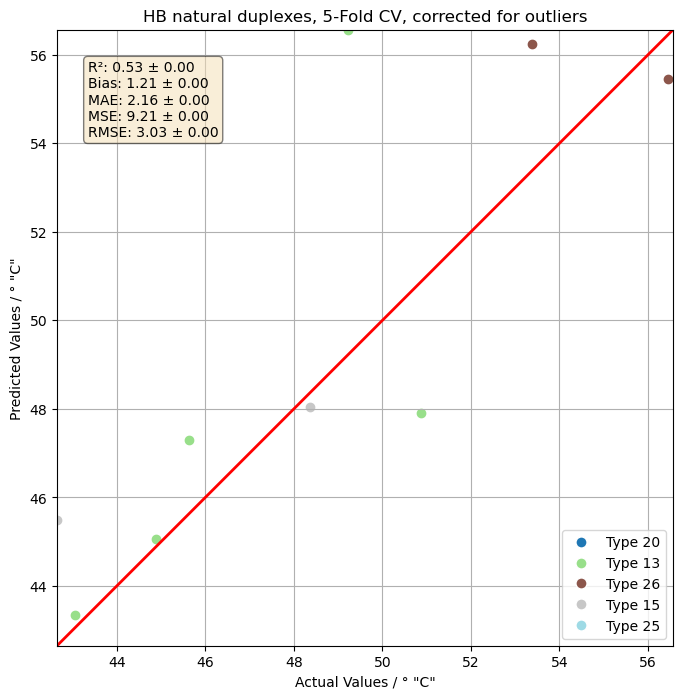

In [286]:
# Convert lists to numpy arrays for easier calculations
filtered_predictions = np.array(filtered_results['predictions'])
filtered_actuals = np.array(filtered_results['actuals'])

# Recalculate statistics
bias = np.mean(filtered_predictions - filtered_actuals)
mae = mean_absolute_error(filtered_actuals, filtered_predictions)
mse = mean_squared_error(filtered_actuals, filtered_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(filtered_actuals, filtered_predictions)

# Update the filtered_results dictionary
filtered_results['bias_list'] = [bias]
filtered_results['mae_list'] = [mae]
filtered_results['mse_list'] = [mse]
filtered_results['rmse_list'] = [rmse]
filtered_results['r2_list'] = [r2]


# metrics = plot_predictions_and_metrics(filtered_results, df_natural, name_col='Length',second_plot=False)
metrics = plot_predictions_and_metrics(filtered_results, df_natural, name_col='Length', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='test_correction',title='HB natural duplexes, 5-Fold CV, corrected for outliers')


In [ ]:
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]

### RF Score with Parametr Grid on Chemically modified and mismatched Duplexes

In [262]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
df_exclude_natural = df_mh_without_H[~df_mh_without_H['type'].str.contains('natural', case=False, na=False)]
X2 = df_exclude_natural[df_exclude_natural.columns[15:]]
y2 = df_exclude_natural['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model(X2, y2, df_type=df_exclude_natural, model=model, param_grid=param_grid)
# metrics = plot_predictions_and_metrics(results, df_exclude_natural, name_col='type')

Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


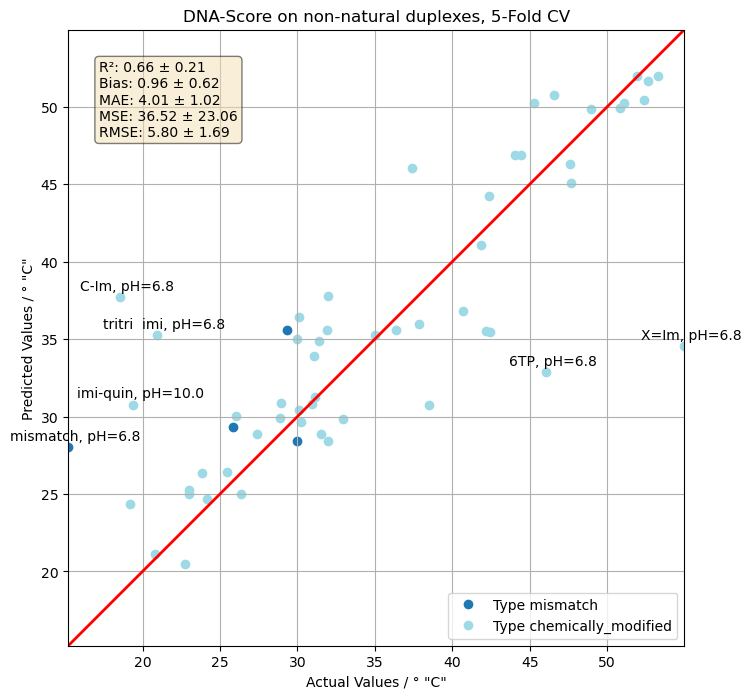

In [266]:
metrics = plot_predictions_and_metrics(results, df_exclude_natural, name_col='type', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='5fold_HB_without_H_grid_search_HB_non_natural',title='DNA-Score on non-natural duplexes, 5-Fold CV')

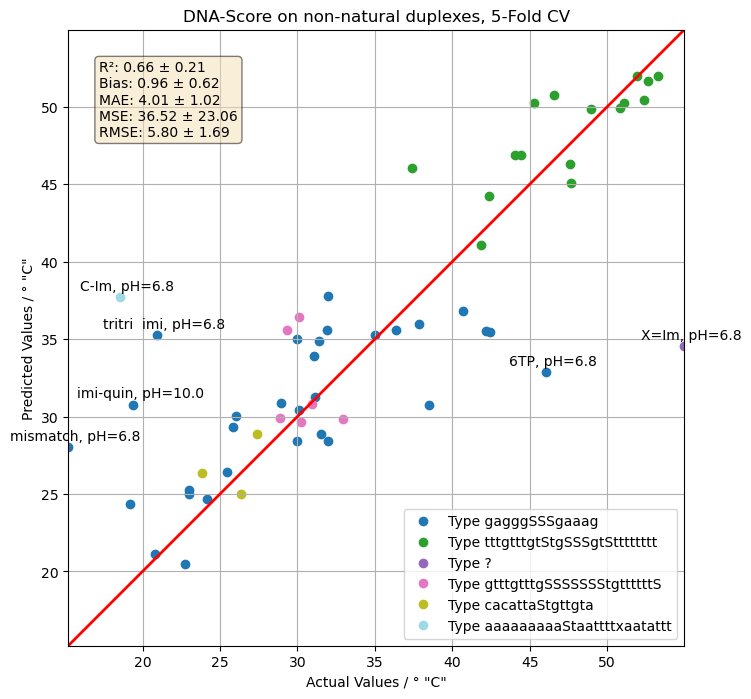

In [265]:
metrics = plot_predictions_and_metrics(results, df_exclude_natural, name_col='Consensuc sequence', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='5fold_HB_without_H_grid_search_HB_non_natural__legened_consensus_seq',title='DNA-Score on non-natural duplexes, 5-Fold CV')

In [124]:
df_exclude_natural = df_mh[~df_mh['type'].str.contains('natural', case=False, na=False)]

Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best parameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


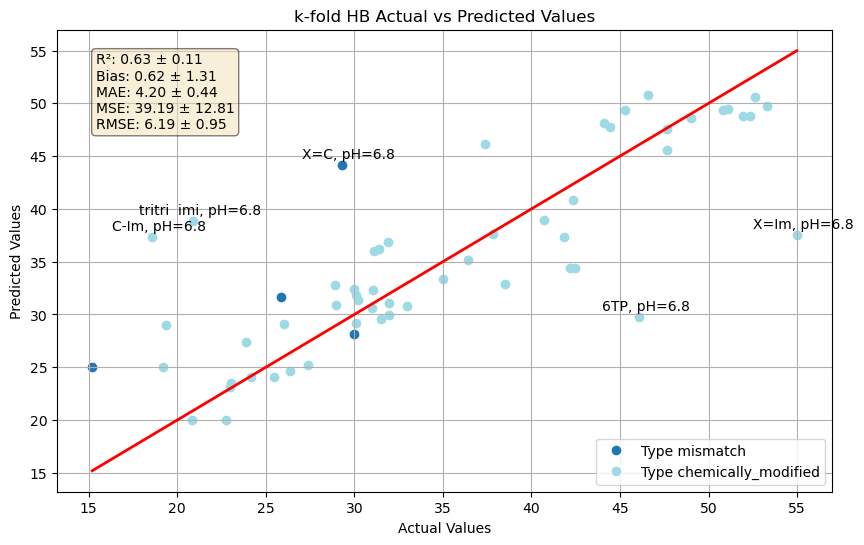

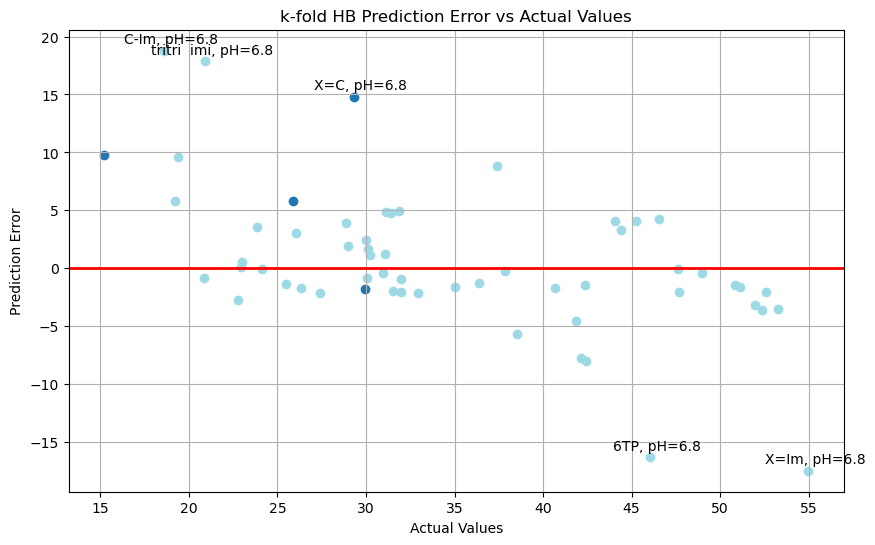

In [42]:
# Filter df_hb to exclude rows where the 'type' column contains the word 'natural'
df_exclude_natural = df_mh[~df_mh['type'].str.contains('natural', case=False, na=False)]

# Now use the filtered DataFrame for further analysis
X2 = df_exclude_natural[filtered_columns]
y2 = df_exclude_natural['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_exclude_natural, model=model, param_grid=param_grid)
metrics = plot_predictions_and_metrics(results, df_exclude_natural, name_col='type')

## LOO Cross Validation

In [59]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

def train_and_evaluate_model_loo(X, y, df_type, model=None):
    """
    Train and evaluate a model using Leave-One-Out cross-validation.

    Parameters:
    X (pd.DataFrame): Feature data.
    y (pd.Series): Target data.
    df_type (pd.DataFrame): DataFrame containing additional columns, including the index.
    model (sklearn model, optional): Model to be trained. Defaults to RandomForestRegressor.

    Returns:
    dict: A dictionary containing predictions, actuals, index_list, and evaluation metrics.
    """
    
    if model is None:
        model = RandomForestRegressor()

    # Define Leave-One-Out cross-validation
    loo = LeaveOneOut()

    # Lists to store predictions, actuals, and their corresponding indices
    predictions = []
    actuals = []
    index_list = []

    bias_list = []
    mae_list = []
    r2_list = []
    mse_list = []
    rmse_list = []

    for train_index, val_index in loo.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_val_pred = model.predict(X_val)
        predictions.extend(y_val_pred)
        actuals.extend(y_val)
        index_list.extend(df_type.iloc[val_index].index)

        # Calculate metrics
        bias = np.mean(np.array(y_val_pred) - np.array(y_val))
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)
        mse = mean_squared_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)

        # Store metrics
        bias_list.append(bias)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)

    # Return a dictionary of results
    return {
        'predictions': predictions,
        'actuals': actuals,
        'index_list': index_list,
        'bias_list': bias_list,
        'mae_list': mae_list,
        'mse_list': mse_list,
        'rmse_list': rmse_list,
        'r2_list': r2_list
    }

###  All types Linear Regression

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/si

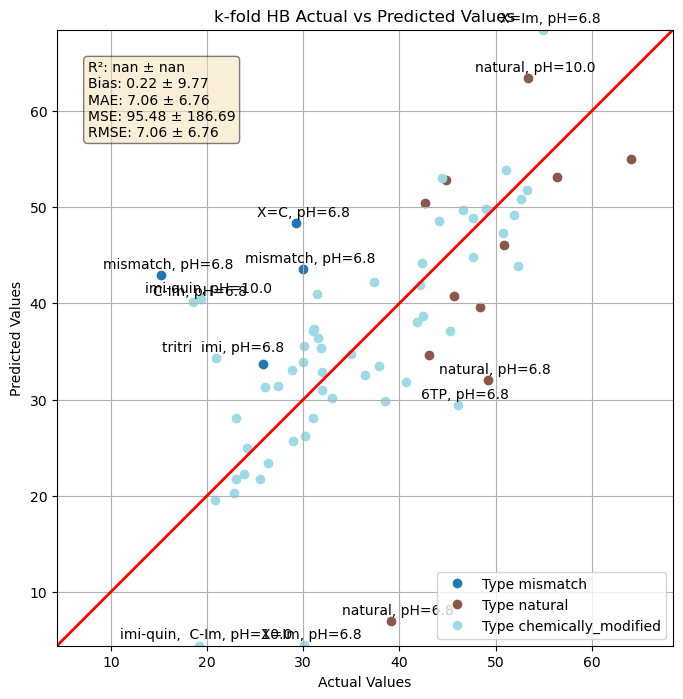

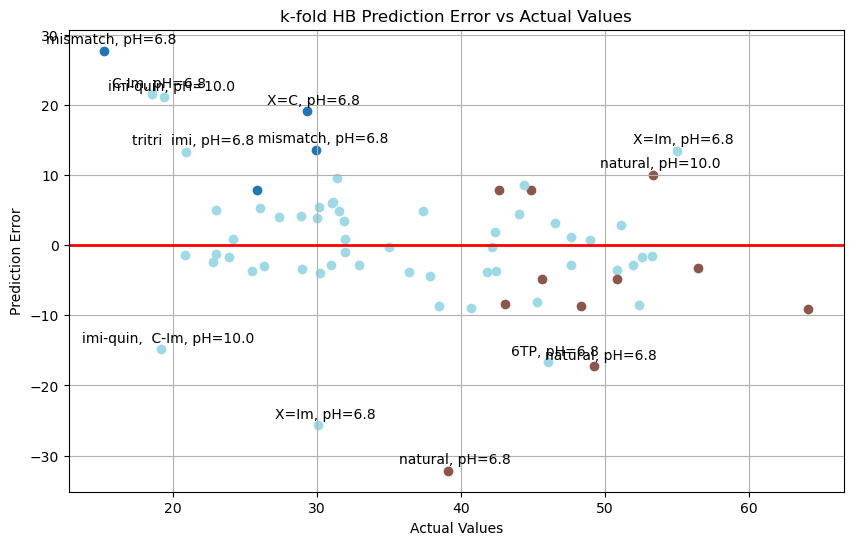

In [60]:
X2 = df_mh[filtered_columns]
y2 = df_mh['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model_loo(X2, y2, df_type=df_mh, model=model)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

In [67]:
df_mh.columns[8:13]

Index(['Length', 'Count_G', 'Count_A', 'Count_C', 'Count_T'], dtype='object')

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/si

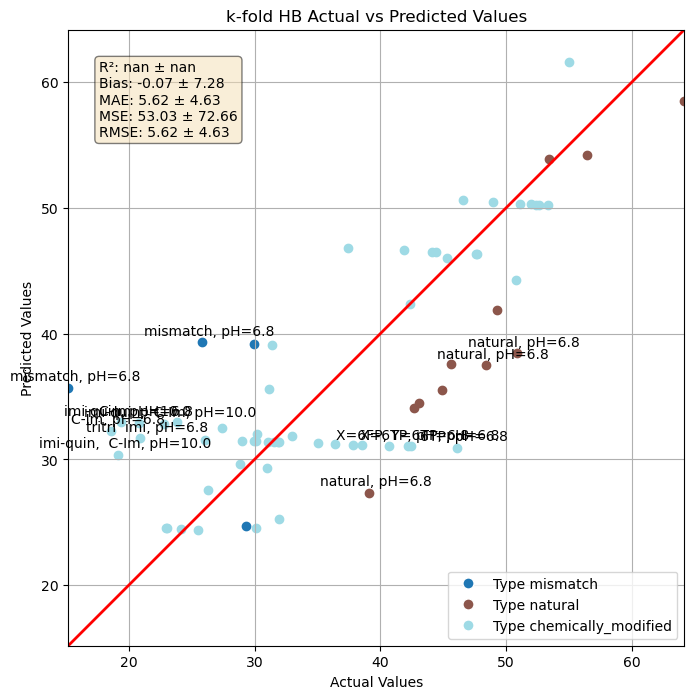

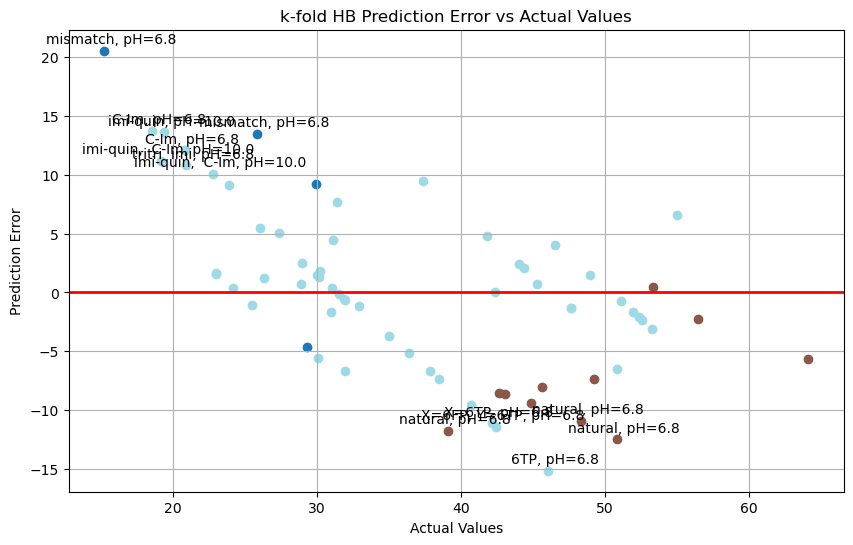

In [69]:
X2 = df_mh[df_mh.columns[8:15]]
y2 = df_mh['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model_loo(X2, y2, df_type=df_mh, model=model)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

### All types RF Score

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/si

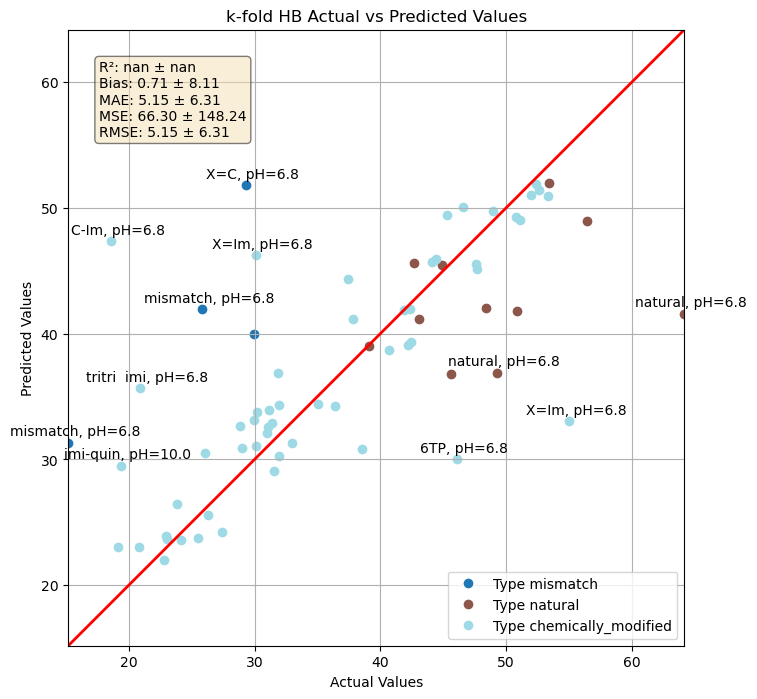

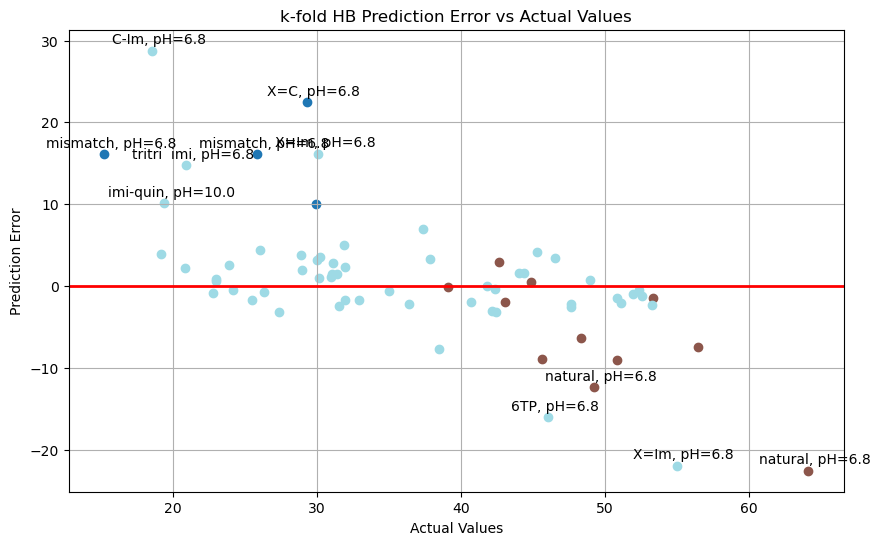

In [61]:
X2 = df_mh[filtered_columns]
y2 = df_mh['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model_loo(X2, y2, df_type=df_mh, model=model)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

### Natural Linear regression

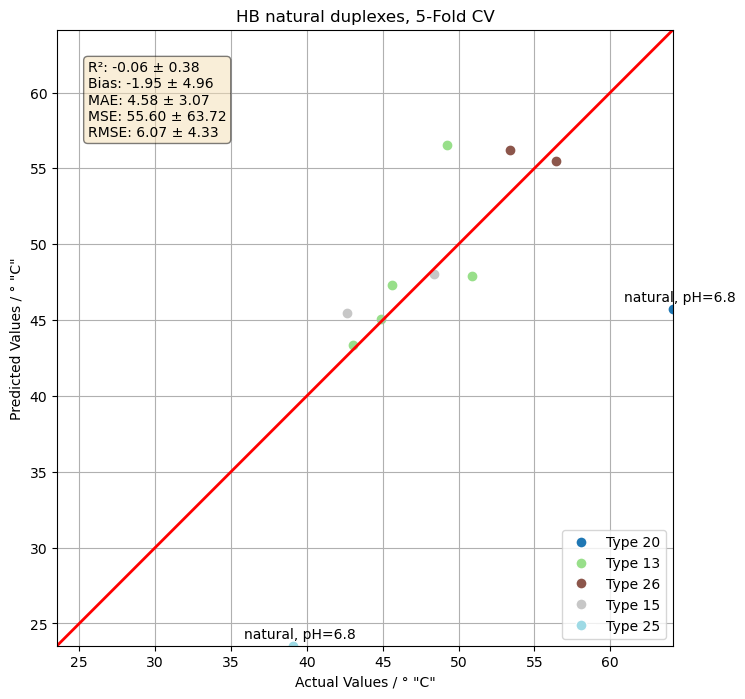

In [283]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]

# Now use the filtered DataFrame for further analysis
X2 = df_natural[df_natural.columns[8:15]]
y2 = df_natural['Tm']
model = LinearRegression()



# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_natural, model=model,n_splits=3)
# metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length')
metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length', error_threshold=10, 
                                      save_plots=True, 
                                      second_plot=False, 
                                      save_name='5fold_HB_natural_linear_model',title='HB natural duplexes, 5-Fold CV')

In [88]:
df_natural

,Tm,Avogadro_file_name,type,Consensuc sequence,Nucleotide shorthand,pH,w3DNA,DNA_conv1,Length,Count_G,...,H_nucleobase-H_sugar,H_sugar-C_sugar,H_sugar-O_backbone,H_sugar-C_nucleobase,H_sugar-O_nucleobase,H_sugar-O_sugar,H_sugar-P_backbone,H_sugar-N_nucleobase,H_sugar-H_nucleobase,H_sugar-H_sugar
1,64.14,tacaggtccatgggatctga.cml,natural,?,natural,6.8,tacaggtccatgggatctga,tacaggtccatgggatctga,20,6,...,1916,1374,169,2466,588,795,135,2149,1865,1874
2,49.23,gagggacagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggacagaaag,ctttctgtccctc,13,1,...,1280,834,102,1312,539,483,79,973,1043,1132
3,53.37,tttgtttgtttgattgtttttttttt.cml,natural,tttgtttgtStgSSSgtStttttttt,natural,10.0,tttgtttgtttgattgtttttttttt,tttgtttgtttgattgtttttttttt,26,4,...,2282,1861,240,3694,190,1064,182,3513,2686,2505
4,44.88,gagggtatgaaag.cml,natural,gagggSSSgaaag,natural,10.0,gagggtatgaaag,gagggtatgaaag,13,6,...,1262,828,99,1358,444,484,79,1072,1072,1144
5,42.65,cacattaatgttgta.cml,natural,cacattaStgttgta,natural,10.0,cacattaatgttgta,cacattaatgttgta,15,2,...,1373,990,116,1881,386,571,95,1611,1417,1360
59,43.06,gagggaaagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggaaagaaag,gagggaaagaaag,13,6,...,1310,829,102,1270,564,484,79,879,1019,1135
60,45.64,gagggagagaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggagagaaag,gagggagagaaag,13,7,...,1309,827,101,1254,533,484,79,912,1016,1131
62,50.87,gagggtgtgaaag.cml,natural,gagggSSSgaaag,natural,6.8,gagggtgtgaaag,gagggtgtgaaag,13,7,...,1261,823,99,1342,414,482,79,1104,1060,1141
63,48.36,cacattagtgttgta.cml,natural,cacattaStgttgta,natural,6.8,cacattagtgttgta,cacattagtgttgta,15,3,...,1373,989,116,1865,354,570,95,1644,1427,1356
64,39.10,aaaaaaaaaataattttaaatattt.cml,natural,aaaaaaaaaStaattttxaatattt,natural,6.8,aaaaaaaaaataattttaaatattt,aaaaaaaaaataattttaaatattt,25,0,...,2464,1790,229,3102,967,1027,175,2260,2285,2409


# ML trained on HB or LZ only

### Train on LZ and predict MH without bias correction

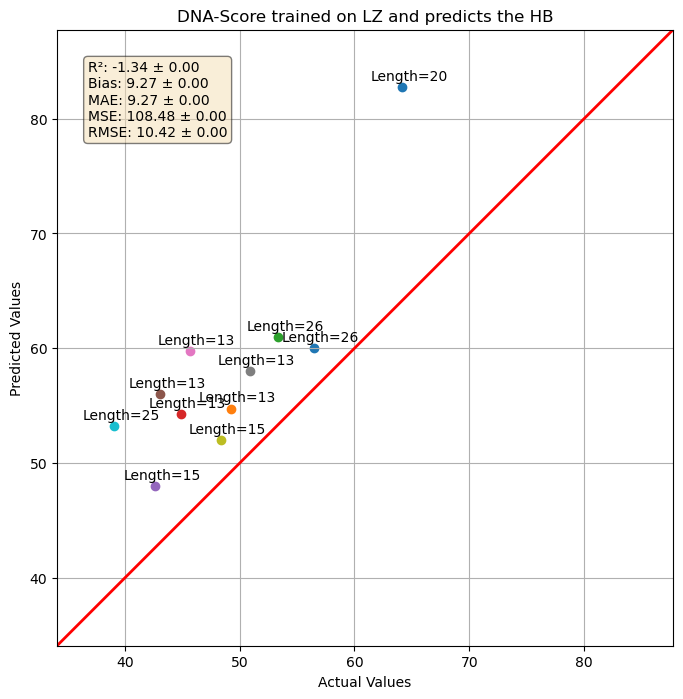

In [274]:
X_train = df_lz[df_lz.columns[2:7]]
y_train = df_lz['Tm']

X_val = df_natural[df_natural.columns[8:13]]
y_val = df_natural['Tm']
df_type = df_natural
name_col='w3DNA'


model = RandomForestRegressor()
model = LinearRegression()

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_val)
predictions.extend(y_val_pred)
actuals.extend(y_val)
# index_list.extend(df_type.iloc[val_index].index)

# Calculate metrics
bias = np.mean(np.array(y_val_pred) - np.array(y_val))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)


unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

# Determine the limits for the axes to ensure they are the same
min_limit = min(min(actuals), min(y_val_pred))-5
max_limit = max(max(actuals), max(predictions))+5

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 8))  # Make the figure square
# plt.scatter(y_val, y_val_pred)
# if (abs(y_val - y_val_pred) > 2).any():
#     # nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#     # pH = f"{df_type['pH'].loc[idx]}"
#     plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

for i, (actual, pred) in enumerate(zip(actuals, predictions)):
    plt.scatter(actual, pred)
    if abs(actual - pred) > 2:
        pH = f"{df_type['Length'].iloc[i]}"
        plt.annotate(f"Length={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')
        # w3DNA = f"{df_type['w3DNA'].iloc[i]}"
        # plt.annotate(f"Length={pH},DNA={w3DNA}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')


plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

# Set the same limits for x and y axes
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('DNA-Score trained on LZ and predicts the HB')
plt.grid(True)

# Ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')

# # Compute and display metrics
# bias = np.mean(bias_list)
# mae = np.mean(mae_list)
# mse = np.mean(mse_list)
# rmse = np.mean(rmse_list)
# r2 = np.mean(r2_list)

# sd_bias = np.std(bias_list)
# sd_mae = np.std(mae_list)
# sd_mse = np.std(mse_list)
# sd_rmse = np.std(rmse_list)
# sd_r2 = np.std(r2_list)

sd_bias = 0
sd_mae = 0
sd_mse = 0
sd_rmse = 0
sd_r2 = 0

plus_minus = "\u00B1"
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)


# if save_plots:
#     plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
plt.savefig(f'LZ_train_predict_HB_natural.png')
plt.show()

## Train on LZ and predict MH with bias correction

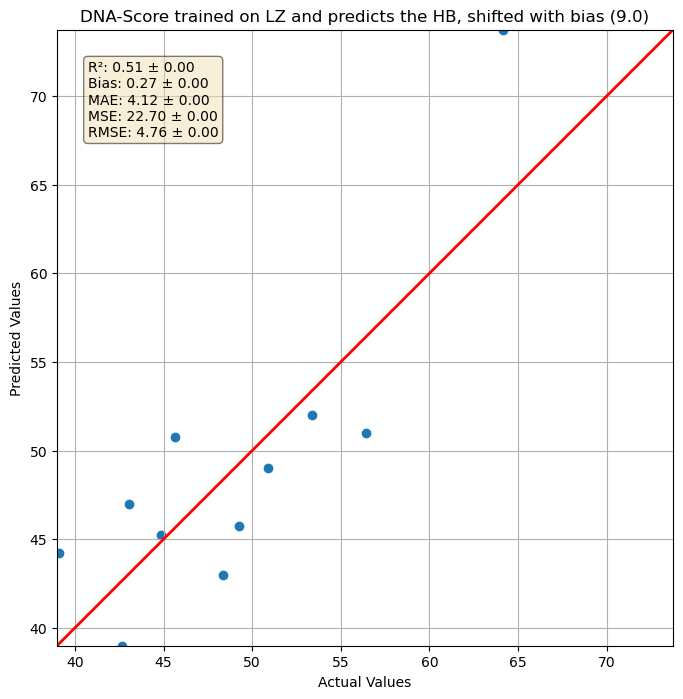

In [275]:
X_train = df_lz[df_lz.columns[2:7]]
y_train = df_lz['Tm']

X_val = df_natural[df_natural.columns[8:13]]
y_val = df_natural['Tm']
df_type = df_mh
model = RandomForestRegressor()
model = LinearRegression()

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_val)-9
predictions.extend(y_val_pred)
actuals.extend(y_val)
# index_list.extend(df_type.iloc[val_index].index)

# Calculate metrics
bias = np.mean(np.array(y_val_pred) - np.array(y_val))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)


# unique_types = df_type[name_col].unique()
# cmap = plt.get_cmap('tab20', len(unique_types))
# color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# # Assign colors based on type
# colors = df_type[name_col].map(color_mapping)

# Determine the limits for the axes to ensure they are the same
min_limit = min(min(actuals), min(y_val_pred))
max_limit = max(max(actuals), max(predictions))

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 8))  # Make the figure square
plt.scatter(y_val, y_val_pred)
# if abs(y_vaл-y_val_pred) > error_threshold:
#     nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#     pH = f"{df_type['pH'].loc[idx]}"
#     plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

# Set the same limits for x and y axes
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('DNA-Score trained on LZ and predicts the HB, shifted with bias (9.0)')
plt.grid(True)

# Ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')

# # Compute and display metrics
# bias = np.mean(bias_list)
# mae = np.mean(mae_list)
# mse = np.mean(mse_list)
# rmse = np.mean(rmse_list)
# r2 = np.mean(r2_list)

# sd_bias = np.std(bias_list)
# sd_mae = np.std(mae_list)
# sd_mse = np.std(mse_list)
# sd_rmse = np.std(rmse_list)
# sd_r2 = np.std(r2_list)

sd_bias = 0
sd_mae = 0
sd_mse = 0
sd_rmse = 0
sd_r2 = 0

plus_minus = "\u00B1"
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)


# if save_plots:
#     plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
plt.savefig(f'LZ_train_predict_HB_natural_bias_edited.png')
plt.show()

## Train on HB and predict Lomzov

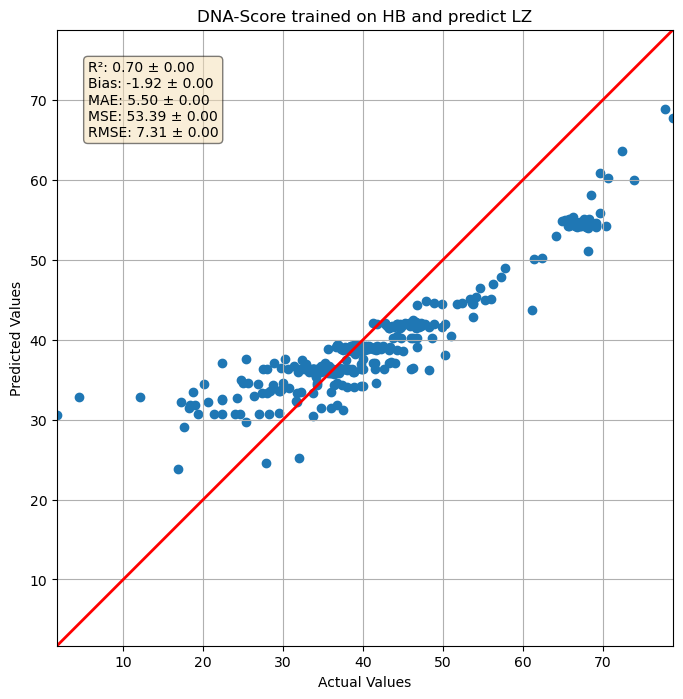

In [276]:
X_val = df_lz[df_lz.columns[2:7]]
y_val = df_lz['Tm']

X_train = df_natural[df_natural.columns[8:13]]
y_train = df_natural['Tm']
df_type = df_mh
model = RandomForestRegressor()
model = LinearRegression()

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_val)
predictions.extend(y_val_pred)
actuals.extend(y_val)
# index_list.extend(df_type.iloc[val_index].index)

# Calculate metrics
bias = np.mean(np.array(y_val_pred) - np.array(y_val))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)


# unique_types = df_type[name_col].unique()
# cmap = plt.get_cmap('tab20', len(unique_types))
# color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# # Assign colors based on type
# colors = df_type[name_col].map(color_mapping)

# Determine the limits for the axes to ensure they are the same
min_limit = min(min(actuals), min(y_val_pred))
max_limit = max(max(actuals), max(predictions))

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 8))  # Make the figure square
plt.scatter(y_val, y_val_pred)
# if abs(y_vaл-y_val_pred) > error_threshold:
#     nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#     pH = f"{df_type['pH'].loc[idx]}"
#     plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

# Set the same limits for x and y axes
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('DNA-Score trained on HB and predict LZ')
plt.grid(True)

# Ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')

# # Compute and display metrics
# bias = np.mean(bias_list)
# mae = np.mean(mae_list)
# mse = np.mean(mse_list)
# rmse = np.mean(rmse_list)
# r2 = np.mean(r2_list)

# sd_bias = np.std(bias_list)
# sd_mae = np.std(mae_list)
# sd_mse = np.std(mse_list)
# sd_rmse = np.std(rmse_list)
# sd_r2 = np.std(r2_list)

sd_bias = 0
sd_mae = 0
sd_mse = 0
sd_rmse = 0
sd_r2 = 0

plus_minus = "\u00B1"
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)


# if save_plots:
#     plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
plt.savefig(f'Trained on HB and predict LZ.png')
plt.show()

### Train onh HB and predict LZ with bias correction

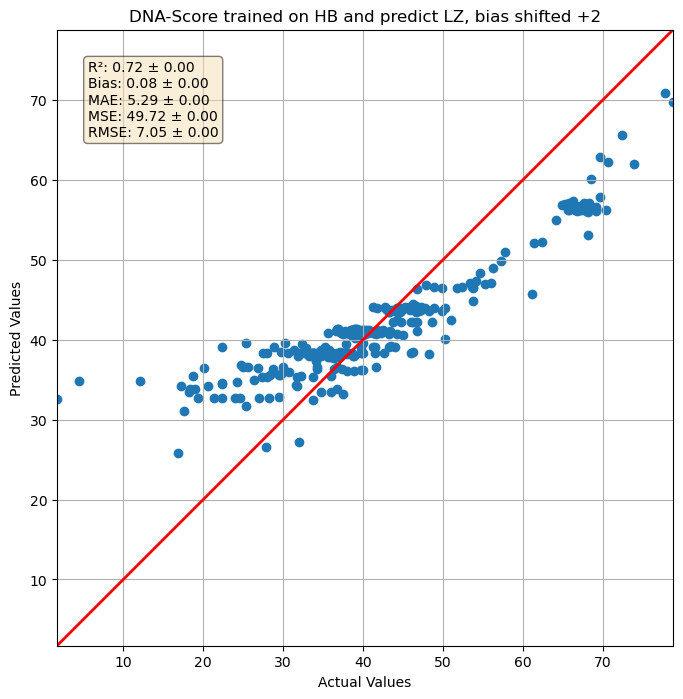

In [277]:
X_val = df_lz[df_lz.columns[2:7]]
y_val = df_lz['Tm']

X_train = df_natural[df_natural.columns[8:13]]
y_train = df_natural['Tm']
df_type = df_mh
model = RandomForestRegressor()
model = LinearRegression()

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_val)+2
predictions.extend(y_val_pred)
actuals.extend(y_val)
# index_list.extend(df_type.iloc[val_index].index)

# Calculate metrics
bias = np.mean(np.array(y_val_pred) - np.array(y_val))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)


# unique_types = df_type[name_col].unique()
# cmap = plt.get_cmap('tab20', len(unique_types))
# color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# # Assign colors based on type
# colors = df_type[name_col].map(color_mapping)

# Determine the limits for the axes to ensure they are the same
min_limit = min(min(actuals), min(y_val_pred))
max_limit = max(max(actuals), max(predictions))

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 8))  # Make the figure square
plt.scatter(y_val, y_val_pred)
# if abs(y_vaл-y_val_pred) > error_threshold:
#     nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#     pH = f"{df_type['pH'].loc[idx]}"
#     plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

# Set the same limits for x and y axes
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('DNA-Score trained on HB and predict LZ, bias shifted +2')
plt.grid(True)

# Ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')

# # Compute and display metrics
# bias = np.mean(bias_list)
# mae = np.mean(mae_list)
# mse = np.mean(mse_list)
# rmse = np.mean(rmse_list)
# r2 = np.mean(r2_list)

# sd_bias = np.std(bias_list)
# sd_mae = np.std(mae_list)
# sd_mse = np.std(mse_list)
# sd_rmse = np.std(rmse_list)
# sd_r2 = np.std(r2_list)

sd_bias = 0
sd_mae = 0
sd_mse = 0
sd_rmse = 0
sd_r2 = 0

plus_minus = "\u00B1"
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)


# if save_plots:
#     plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
plt.savefig(f'Trained on HB and predict LZ_bias shifted.png')
plt.show()

Without H

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
df_lz_without_H = df_lz.drop(columns=[col for col in df_lz.columns if 'H_' in col])
df_mh_without_H = df_mh.drop(columns=[col for col in df_mh.columns if 'H_' in col])

In [114]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_mh_without_H_natural = df_mh_without_H[df_mh_without_H['type'].str.contains('natural', case=False, na=False)]
df_mh_without_H_natural
df_lz_without_H.columns

Index(['Tm', 'DNA', 'Length', 'Count_G', 'Count_A', 'Count_C', 'Count_T',
       'Count_X', 'Count_Y', 'C_sugar-C_sugar', 'C_sugar-O_backbone',
       'C_sugar-C_nucleobase', 'C_sugar-O_nucleobase', 'C_sugar-O_sugar',
       'C_sugar-P_backbone', 'C_sugar-N_nucleobase', 'O_backbone-C_sugar',
       'O_backbone-O_backbone', 'O_backbone-C_nucleobase',
       'O_backbone-O_nucleobase', 'O_backbone-O_sugar',
       'O_backbone-P_backbone', 'O_backbone-N_nucleobase',
       'C_nucleobase-C_sugar', 'C_nucleobase-O_backbone',
       'C_nucleobase-C_nucleobase', 'C_nucleobase-O_nucleobase',
       'C_nucleobase-O_sugar', 'C_nucleobase-P_backbone',
       'C_nucleobase-N_nucleobase', 'O_nucleobase-C_sugar',
       'O_nucleobase-O_backbone', 'O_nucleobase-C_nucleobase',
       'O_nucleobase-O_nucleobase', 'O_nucleobase-O_sugar',
       'O_nucleobase-P_backbone', 'O_nucleobase-N_nucleobase',
       'O_sugar-C_sugar', 'O_sugar-O_backbone', 'O_sugar-C_nucleobase',
       'O_sugar-O_nucleobase', 'O_

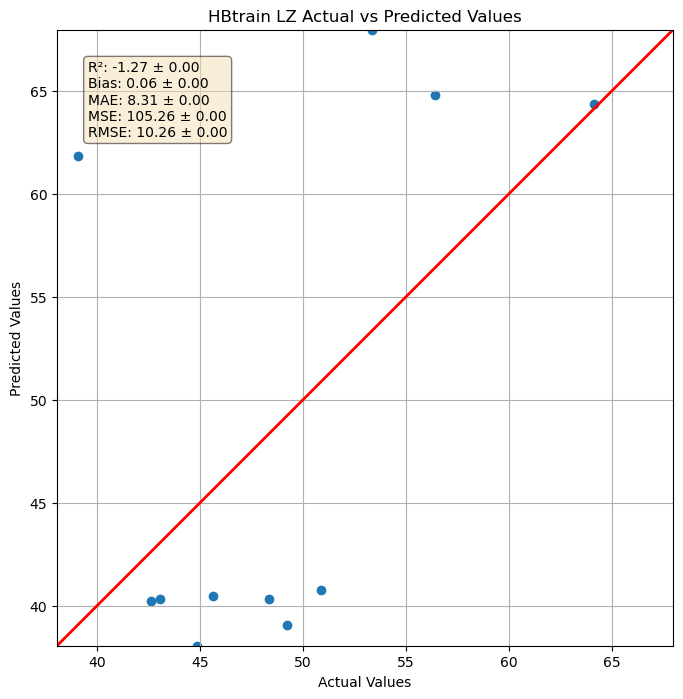

In [120]:
X_train = df_lz_without_H[df_lz_without_H.columns[9:]]
y_train = df_lz_without_H['Tm']

X_val = df_mh_without_H_natural[df_mh_without_H_natural.columns[15:]]
y_val = df_mh_without_H_natural['Tm']
df_type = df_mh_without_H_natural
model = ()
model = LinearRegression()

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []


# Train the model
model.fit(X_train, y_train)

# Make predictions
y_val_pred = model.predict(X_val)
predictions.extend(y_val_pred)
actuals.extend(y_val)
# index_list.extend(df_type.iloc[val_index].index)

# Calculate metrics
bias = np.mean(np.array(y_val_pred) - np.array(y_val))
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)


# unique_types = df_type[name_col].unique()
# cmap = plt.get_cmap('tab20', len(unique_types))
# color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# # Assign colors based on type
# colors = df_type[name_col].map(color_mapping)

# Determine the limits for the axes to ensure they are the same
min_limit = min(min(actuals), min(y_val_pred))
max_limit = max(max(actuals), max(predictions))

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 8))  # Make the figure square
plt.scatter(y_val, y_val_pred)
# if abs(y_vaл-y_val_pred) > error_threshold:
#     nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#     pH = f"{df_type['pH'].loc[idx]}"
#     plt.annotate(f"{nucleotide_strand}, pH={pH}", (actual, pred), textcoords="offset points", xytext=(5, 5), ha='center')

plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

# Set the same limits for x and y axes
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('HBtrain LZ Actual vs Predicted Values')
plt.grid(True)

# Ensure the plot is square
plt.gca().set_aspect('equal', adjustable='box')

# # Compute and display metrics
# bias = np.mean(bias_list)
# mae = np.mean(mae_list)
# mse = np.mean(mse_list)
# rmse = np.mean(rmse_list)
# r2 = np.mean(r2_list)

# sd_bias = np.std(bias_list)
# sd_mae = np.std(mae_list)
# sd_mse = np.std(mse_list)
# sd_rmse = np.std(rmse_list)
# sd_r2 = np.std(r2_list)

sd_bias = 0
sd_mae = 0
sd_mse = 0
sd_rmse = 0
sd_r2 = 0

plus_minus = "\u00B1"
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)


# if save_plots:
#     plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
plt.show()

# ML Experiments - Mix the Lomzov and MH

### Linear regression with Sequence Stats on MH and LZ with weighted samples. on a reversed K-fold (minimum number of samples)

In [280]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def preprocess_datasets(lz_extended, mh_extended):
    """Preprocess the datasets by extracting features and target variables, then combine them."""
    X1 = lz_extended.drop(columns=['Tm'])
    X2 = mh_extended.drop(columns=['Tm'])
    y1 = lz_extended['Tm']
    y2 = mh_extended['Tm']
    
    X_combined = np.concatenate((X1, X2), axis=0)
    y_combined = np.concatenate((y1, y2), axis=0)
    
    return X1, X2, y1, y2, X_combined, y_combined

def calculate_additional_metrics(y_true, y_pred):
    """Calculate R², MSE, RMSE, Bias, and SDEP."""
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    bias = np.mean(y_pred - y_true)
    sdep = np.std(y_pred - y_true, ddof=1)
    
    return r2, mae, mse, rmse, bias, sdep

def train_and_validate_model_weights(X1, y1, X2, y2, weight, kf):
    """Train the model on the training data with the specified weight and validate it."""
    metrics_list = []
    
    for train_index, val_index in kf.split(X2):
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = LinearRegression()
        model.fit(X_train, y_train, sample_weight=weights)
        
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        # Calculate metrics for validation
        r2, mae, mse, rmse, bias, sdep = calculate_additional_metrics(y_val, y_val_pred)
        
        # Calculate metrics for training portion
        r2_1, mae1, mse1, rmse1, bias1, sdep1 = calculate_additional_metrics(y1, y_val_pred1)
        
        # Append metrics to the list
        metrics_list.append({
            'weight': weight,
            'val_metrics': {
                'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse, 'bias': bias, 'sdep': sdep
            },
            'train_metrics': {
                'r2': r2_1, 'mae': mae1, 'mse': mse1, 'rmse': rmse1, 'bias': bias1, 'sdep': sdep1
            }
        })
    
    return metrics_list


def experiment_with_weights(X1, y1, X2, y2, weights_range, kf):
    """Run the experiment across a range of weights, and return the best weight and corresponding scores."""
    best_weight = None
    best_score = float('inf')
    
    results = {
        'weights': [],
        'metrics': {}
    }
    
    for weight in weights_range:
        metrics_list = train_and_validate_model_weights(X1, y1, X2, y2, weight, kf)
        
        # Aggregate the metrics for the current weight
        avg_metrics = {
            'val_metrics': {'r2': [], 'mae': [], 'mse': [], 'rmse': [], 'bias': [], 'sdep': []},
            'train_metrics': {'r2': [], 'mae': [], 'mse': [], 'rmse': [], 'bias': [], 'sdep': []}
        }
        
        for metrics in metrics_list:
            for key in avg_metrics['val_metrics']:
                avg_metrics['val_metrics'][key].append(metrics['val_metrics'][key])
                avg_metrics['train_metrics'][key].append(metrics['train_metrics'][key])
        
        # Calculate the average for each metric
        for key in avg_metrics['val_metrics']:
            avg_metrics['val_metrics'][key] = np.mean(avg_metrics['val_metrics'][key])
            avg_metrics['train_metrics'][key] = np.mean(avg_metrics['train_metrics'][key])
        
        # Store results
        results['weights'].append(weight)
        results['metrics'][weight] = avg_metrics
        
        print(f"Weight: {weight}, Avg. MAE: {avg_metrics['val_metrics']['mae']}, Avg. MAE1: {avg_metrics['train_metrics']['mae']}")
        
        if avg_metrics['train_metrics']['mae'] < avg_metrics['val_metrics']['mae']:
            best_score = avg_metrics['val_metrics']['mae']
            best_weight = weight
    
    results['best_weight'] = best_weight
    results['best_score'] = best_score
    
    return results


def plot_results_weights(results, metric='mae', plot_type='both'):
    """
    Plot the selected metric against weights.
    
    Parameters:
    - results: The dictionary returned from experiment_with_weights containing the weights and metrics.
    - metric: The metric to plot ('r2', 'mae', 'mse', 'rmse', 'bias', 'sdep').
    - plot_type: 'train', 'val', or 'both' to indicate which set of metrics to plot.
    """
    weights_list = results['weights']
    
    train_metric_values = []
    val_metric_values = []
    
    # Collect the metric values for each weight
    for weight in weights_list:
        if plot_type in ['train', 'both']:
            train_metric_values.append(results['metrics'][weight]['train_metrics'][metric])
        if plot_type in ['val', 'both']:
            val_metric_values.append(results['metrics'][weight]['val_metrics'][metric])
    
    plt.figure(figsize=(10, 6))
    
    # Plot the metrics according to the selected plot_type
    if plot_type in ['train', 'both']:
        plt.plot(weights_list, train_metric_values, label=f'Train {metric.upper()}')
    if plot_type in ['val', 'both']:
        plt.plot(weights_list, val_metric_values, label=f'Validation {metric.upper()}')
    
    plt.xlabel('Weights')
    plt.ylabel(f'{metric.upper()}')
    plt.title(f'{metric.upper()} vs. Weights')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Weight_adjusted_{metric}.png')
    plt.show()


In [147]:
df_lz_without_H.iloc[:, [0] + list(range(2,7))]

,Tm,Length,Count_G,Count_A,Count_C,Count_T
0,16.9,8,0,8,0,0
1,27.9,9,0,9,0,0
2,32.0,10,0,10,0,0
3,35.7,8,2,3,2,1
4,37.0,8,3,3,1,1
...,...,...,...,...,...,...
300,28.7,8,0,1,3,4
301,32.9,8,2,1,2,3
302,69.2,16,5,4,3,4
303,35.8,8,3,1,1,3


In [281]:
selected_mh=df_mh_without_H_natural.iloc[:, [0] + list(range(8, 13))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(2,7))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 250)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


Weight: 1.0, Avg. MAE: 10.095415840530187, Avg. MAE1: 3.0132766297554108
Weight: 3.004016064257028, Avg. MAE: 9.054131256219202, Avg. MAE1: 3.071344725637495
Weight: 5.008032128514056, Avg. MAE: 8.548590685359233, Avg. MAE1: 3.1381027375532096
Weight: 7.0120481927710845, Avg. MAE: 8.354881163048905, Avg. MAE1: 3.190857680696734
Weight: 9.016064257028113, Avg. MAE: 8.31207544580134, Avg. MAE1: 3.2401781352243706
Weight: 11.02008032128514, Avg. MAE: 8.215951734104602, Avg. MAE1: 3.289077296452864
Weight: 13.024096385542169, Avg. MAE: 8.304268359037597, Avg. MAE1: 3.3158045417415853
Weight: 15.028112449799197, Avg. MAE: 8.361393995619814, Avg. MAE1: 3.3465790697012707
Weight: 17.032128514056225, Avg. MAE: 8.401492334740773, Avg. MAE1: 3.3768745094729526
Weight: 19.036144578313255, Avg. MAE: 8.538174329516115, Avg. MAE1: 3.3863066111731333
Weight: 21.04016064257028, Avg. MAE: 8.281583648485876, Avg. MAE1: 3.4212269711593177
Weight: 23.044176706827308, Avg. MAE: 8.589401661930804, Avg. MAE1

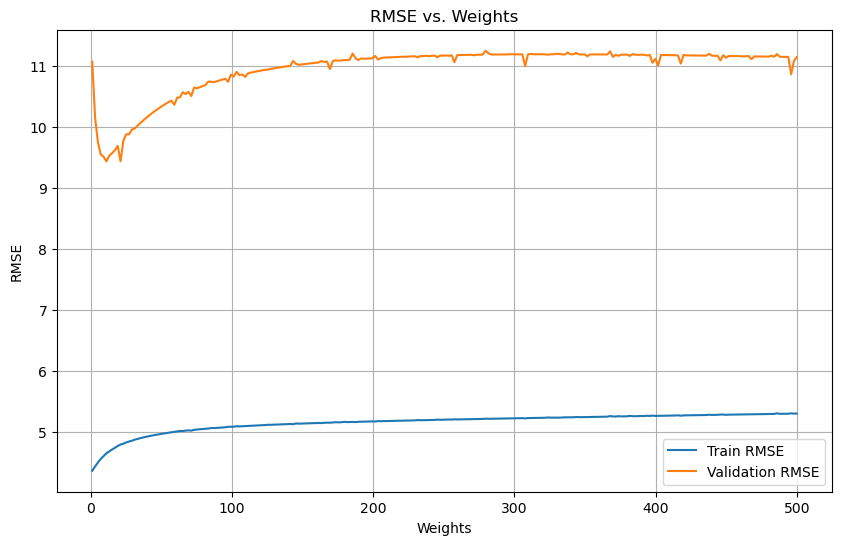

In [282]:
plot_results_weights(results, metric='rmse', plot_type='both')

In [169]:
metrics_for_best_weight

{'val_metrics': {'r2': -2.6219305963280246,
  'mae': 9.193989380531491,
  'mse': 129.37225659156474,
  'rmse': 11.151638856262402,
  'bias': 4.324729023314243,
  'sdep': 7.998967716483522},
 'train_metrics': {'r2': 0.8381879603321903,
  'mae': 3.8580312047697918,
  'mse': 28.60641110940461,
  'rmse': 5.305904222893367,
  'bias': -0.7263640795440455,
  'sdep': 5.261526210082698}}

### natural Duplexes with other features

In [173]:
selected_mh=df_mh_without_H_natural.iloc[:, [0] + list(range(8, 15))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(2,9))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 250)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


Weight: 1.0, Avg. MAE: 9.736824025100056, Avg. MAE1: 3.0164425845866605
Weight: 3.004016064257028, Avg. MAE: 8.51827896397664, Avg. MAE1: 3.076246396557103
Weight: 5.008032128514056, Avg. MAE: 8.340160942065602, Avg. MAE1: 3.146678430183301
Weight: 7.0120481927710845, Avg. MAE: 7.957274417244193, Avg. MAE1: 3.1850509369203204
Weight: 9.016064257028113, Avg. MAE: 8.186041424307588, Avg. MAE1: 3.24722396728319
Weight: 11.02008032128514, Avg. MAE: 8.215528853283143, Avg. MAE1: 3.291532593761671
Weight: 13.024096385542169, Avg. MAE: 8.212509237698209, Avg. MAE1: 3.3248335819301067
Weight: 15.028112449799197, Avg. MAE: 8.21879510000041, Avg. MAE1: 3.3476246431146026
Weight: 17.032128514056225, Avg. MAE: 8.291060069646608, Avg. MAE1: 3.392833105076053
Weight: 19.036144578313255, Avg. MAE: 8.463871917556823, Avg. MAE1: 3.3884034752588774
Weight: 21.04016064257028, Avg. MAE: 8.483243918100758, Avg. MAE1: 3.42245373798922
Weight: 23.044176706827308, Avg. MAE: 8.490154969795864, Avg. MAE1: 3.441

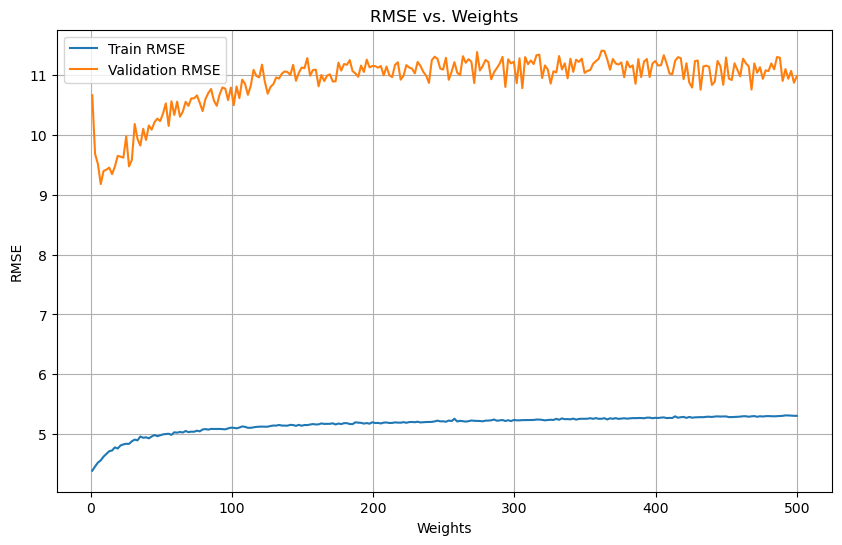

In [174]:
plot_results_weights(results, metric='rmse', plot_type='both')

In [185]:
selected_mh=df_mh_without_H_natural.iloc[:, [0] + list(range(15,len(df_mh_without_H_natural.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 250)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


Weight: 1.0, Avg. MAE: 16.208288083002515, Avg. MAE1: 3.6825769133325355
Weight: 3.004016064257028, Avg. MAE: 14.669546986303754, Avg. MAE1: 3.7314538794267067
Weight: 5.008032128514056, Avg. MAE: 14.018585952312899, Avg. MAE1: 3.757130622577497
Weight: 7.0120481927710845, Avg. MAE: 13.632027199856086, Avg. MAE1: 3.7745652822839735
Weight: 9.016064257028113, Avg. MAE: 13.384236685841367, Avg. MAE1: 3.7869394184160283
Weight: 11.02008032128514, Avg. MAE: 13.206733055236821, Avg. MAE1: 3.7962325138887305
Weight: 13.024096385542169, Avg. MAE: 13.090933831774194, Avg. MAE1: 3.8038690794293615
Weight: 15.028112449799197, Avg. MAE: 13.003831283852813, Avg. MAE1: 3.8101007520935397
Weight: 17.032128514056225, Avg. MAE: 12.930959091122007, Avg. MAE1: 3.8153909345940358
Weight: 19.036144578313255, Avg. MAE: 12.868917264035895, Avg. MAE1: 3.8200365081236654
Weight: 21.04016064257028, Avg. MAE: 12.81535219318988, Avg. MAE1: 3.8241665356517265
Weight: 23.044176706827308, Avg. MAE: 12.7685709476807

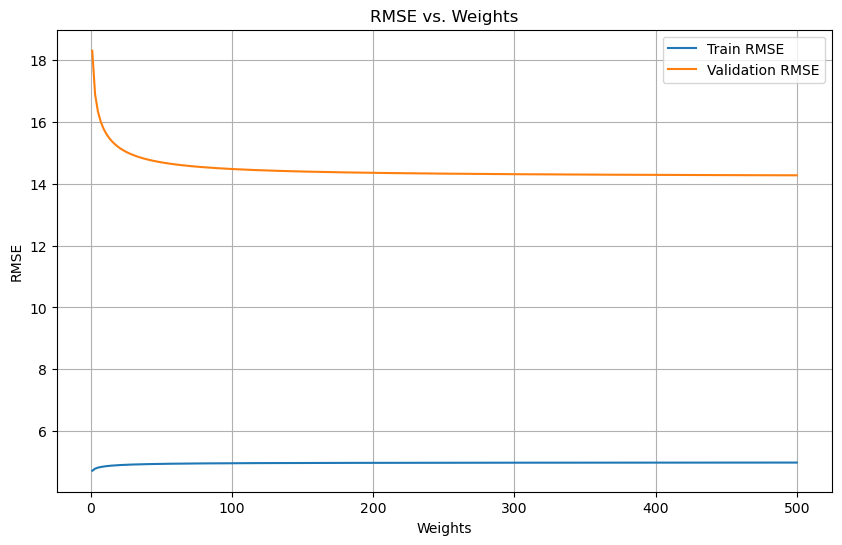

In [186]:
plot_results_weights(results, metric='rmse', plot_type='both')

## RF Score models

In [187]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def preprocess_datasets(lz_extended, mh_extended):
    """Preprocess the datasets by extracting features and target variables, then combine them."""
    X1 = lz_extended.drop(columns=['Tm'])
    X2 = mh_extended.drop(columns=['Tm'])
    y1 = lz_extended['Tm']
    y2 = mh_extended['Tm']
    
    X_combined = np.concatenate((X1, X2), axis=0)
    y_combined = np.concatenate((y1, y2), axis=0)
    
    return X1, X2, y1, y2, X_combined, y_combined

def calculate_additional_metrics(y_true, y_pred):
    """Calculate R², MSE, RMSE, Bias, and SDEP."""
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    bias = np.mean(y_pred - y_true)
    sdep = np.std(y_pred - y_true, ddof=1)
    
    return r2, mae, mse, rmse, bias, sdep

def train_and_validate_model_weights(X1, y1, X2, y2, weight, kf):
    """Train the model on the training data with the specified weight and validate it."""
    metrics_list = []
    
    for train_index, val_index in kf.split(X2):
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        # Calculate metrics for validation
        r2, mae, mse, rmse, bias, sdep = calculate_additional_metrics(y_val, y_val_pred)
        
        # Calculate metrics for training portion
        r2_1, mae1, mse1, rmse1, bias1, sdep1 = calculate_additional_metrics(y1, y_val_pred1)
        
        # Append metrics to the list
        metrics_list.append({
            'weight': weight,
            'val_metrics': {
                'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse, 'bias': bias, 'sdep': sdep
            },
            'train_metrics': {
                'r2': r2_1, 'mae': mae1, 'mse': mse1, 'rmse': rmse1, 'bias': bias1, 'sdep': sdep1
            }
        })
    
    return metrics_list


def experiment_with_weights(X1, y1, X2, y2, weights_range, kf):
    """Run the experiment across a range of weights, and return the best weight and corresponding scores."""
    best_weight = None
    best_score = float('inf')
    
    results = {
        'weights': [],
        'metrics': {}
    }
    
    for weight in weights_range:
        metrics_list = train_and_validate_model_weights(X1, y1, X2, y2, weight, kf)
        
        # Aggregate the metrics for the current weight
        avg_metrics = {
            'val_metrics': {'r2': [], 'mae': [], 'mse': [], 'rmse': [], 'bias': [], 'sdep': []},
            'train_metrics': {'r2': [], 'mae': [], 'mse': [], 'rmse': [], 'bias': [], 'sdep': []}
        }
        
        for metrics in metrics_list:
            for key in avg_metrics['val_metrics']:
                avg_metrics['val_metrics'][key].append(metrics['val_metrics'][key])
                avg_metrics['train_metrics'][key].append(metrics['train_metrics'][key])
        
        # Calculate the average for each metric
        for key in avg_metrics['val_metrics']:
            avg_metrics['val_metrics'][key] = np.mean(avg_metrics['val_metrics'][key])
            avg_metrics['train_metrics'][key] = np.mean(avg_metrics['train_metrics'][key])
        
        # Store results
        results['weights'].append(weight)
        results['metrics'][weight] = avg_metrics
        
        print(f"Weight: {weight}, Avg. MAE: {avg_metrics['val_metrics']['mae']}, Avg. MAE1: {avg_metrics['train_metrics']['mae']}")
        
        if avg_metrics['train_metrics']['mae'] < avg_metrics['val_metrics']['mae']:
            best_score = avg_metrics['val_metrics']['mae']
            best_weight = weight
    
    results['best_weight'] = best_weight
    results['best_score'] = best_score
    
    return results


def plot_results_weights(results, metric='mae', plot_type='both'):
    """
    Plot the selected metric against weights.
    
    Parameters:
    - results: The dictionary returned from experiment_with_weights containing the weights and metrics.
    - metric: The metric to plot ('r2', 'mae', 'mse', 'rmse', 'bias', 'sdep').
    - plot_type: 'train', 'val', or 'both' to indicate which set of metrics to plot.
    """
    weights_list = results['weights']
    
    train_metric_values = []
    val_metric_values = []
    
    # Collect the metric values for each weight
    for weight in weights_list:
        if plot_type in ['train', 'both']:
            train_metric_values.append(results['metrics'][weight]['train_metrics'][metric])
        if plot_type in ['val', 'both']:
            val_metric_values.append(results['metrics'][weight]['val_metrics'][metric])
    
    plt.figure(figsize=(10, 6))
    
    # Plot the metrics according to the selected plot_type
    if plot_type in ['train', 'both']:
        plt.plot(weights_list, train_metric_values, label=f'Train {metric.upper()}')
    if plot_type in ['val', 'both']:
        plt.plot(weights_list, val_metric_values, label=f'Validation {metric.upper()}')
    
    plt.xlabel('Weights')
    plt.ylabel(f'{metric.upper()}')
    plt.title(f'{metric.upper()} vs. Weights')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'Weight_adjusted_{metric}.png')
    plt.show()


### RF models Natural with DNA Score

In [188]:
selected_mh=df_mh_without_H_natural.iloc[:, [0] + list(range(15,len(df_mh_without_H_natural.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 250)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


Weight: 1.0, Avg. MAE: 12.137820064484142, Avg. MAE1: 2.351794250578657
Weight: 3.004016064257028, Avg. MAE: 12.104778658234142, Avg. MAE1: 2.340767879154089
Weight: 5.008032128514056, Avg. MAE: 12.408025950727524, Avg. MAE1: 2.351136056484499
Weight: 7.0120481927710845, Avg. MAE: 11.622159961970912, Avg. MAE1: 2.3648915768885033
Weight: 9.016064257028113, Avg. MAE: 11.416508804563511, Avg. MAE1: 2.3493995253221267
Weight: 11.02008032128514, Avg. MAE: 11.765774966931229, Avg. MAE1: 2.3418042317848364
Weight: 13.024096385542169, Avg. MAE: 12.320721453373025, Avg. MAE1: 2.347194506142764
Weight: 15.028112449799197, Avg. MAE: 12.034037439373913, Avg. MAE1: 2.338636606162507
Weight: 17.032128514056225, Avg. MAE: 11.933122379298958, Avg. MAE1: 2.3513861456962895
Weight: 19.036144578313255, Avg. MAE: 11.920594659391547, Avg. MAE1: 2.3616985854810033
Weight: 21.04016064257028, Avg. MAE: 12.358580133928584, Avg. MAE1: 2.339967852253956
Weight: 23.044176706827308, Avg. MAE: 12.365851041666689, 

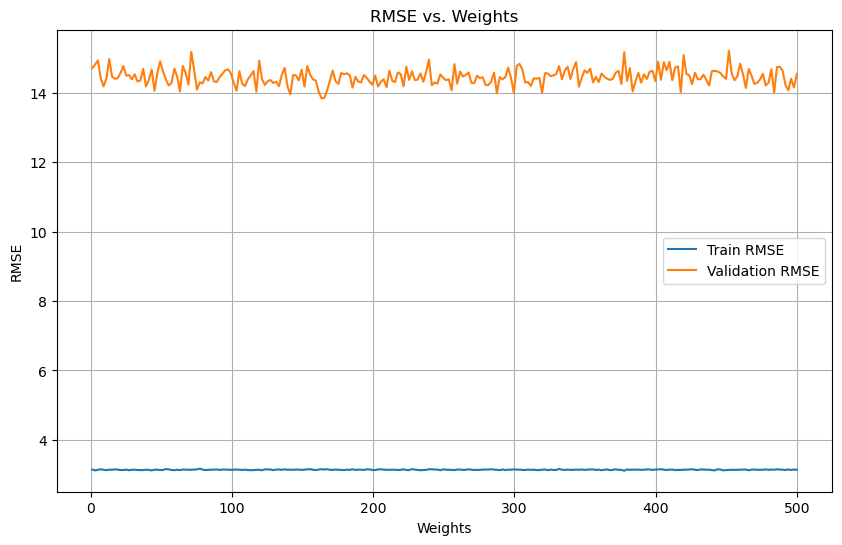

In [189]:
plot_results_weights(results, metric='rmse', plot_type='both')

### RF models All with DNA Score

In [190]:
selected_mh=df_mh_without_H.iloc[:, [0] + list(range(15,len(df_mh_without_H.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 25)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


Weight: 1.0, Avg. MAE: 8.558559530515785, Avg. MAE1: 2.373140942186228
Weight: 21.791666666666668, Avg. MAE: 8.462898596708985, Avg. MAE1: 2.3892523905830045
Weight: 42.583333333333336, Avg. MAE: 8.559660084819185, Avg. MAE1: 2.3789664922281717
Weight: 63.375, Avg. MAE: 8.487554759646674, Avg. MAE1: 2.406728254586943
Weight: 84.16666666666667, Avg. MAE: 8.733835555059729, Avg. MAE1: 2.383256453805757
Weight: 104.95833333333334, Avg. MAE: 8.598876138839376, Avg. MAE1: 2.35978345297917
Weight: 125.75, Avg. MAE: 8.894527079293258, Avg. MAE1: 2.3677569110761727
Weight: 146.54166666666669, Avg. MAE: 8.580659850045787, Avg. MAE1: 2.3707105203788625
Weight: 167.33333333333334, Avg. MAE: 8.561293853283836, Avg. MAE1: 2.395219682389559
Weight: 188.125, Avg. MAE: 8.597390748895712, Avg. MAE1: 2.368829540184314
Weight: 208.91666666666669, Avg. MAE: 8.598177666563423, Avg. MAE1: 2.3834069933504556
Weight: 229.70833333333334, Avg. MAE: 8.317217229135244, Avg. MAE1: 2.3755346216329203
Weight: 250.5,

In [193]:
results.keys()

dict_keys(['weights', 'metrics', 'best_weight', 'best_score'])

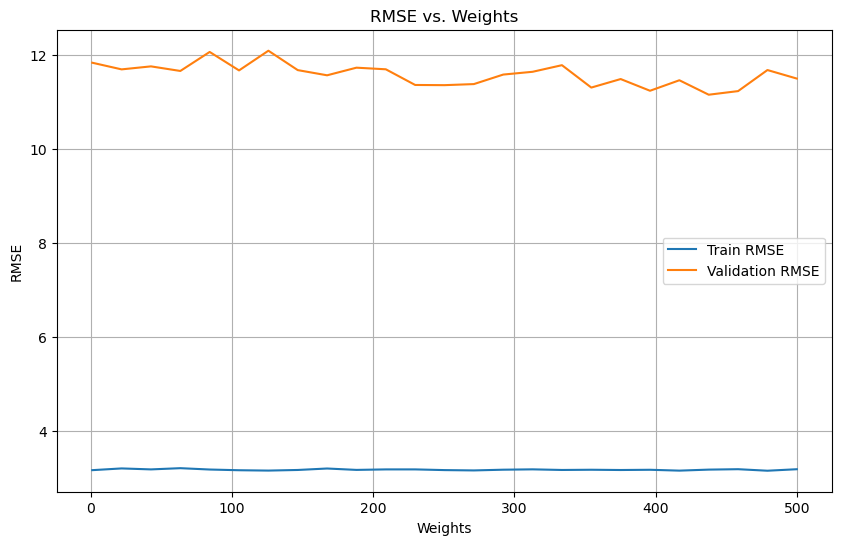

In [191]:
plot_results_weights(results, metric='rmse', plot_type='both')

### Cross validaiton of RF + DNA-Score when combiend with the LZ and MH datasets

In [218]:
def cross_validate_with_best_weight(X1, y1, X2, y2, best_weight, kf):
    """Run k-fold cross-validation with the best weight and store predictions and actual values."""
    all_predictions = []
    all_actuals = []

    for train_index, val_index in kf.split(X2):
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= best_weight  # Apply the best weight found

        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        
        # Predict on the validation set
        y_val_pred = model.predict(X_val)
        
        # Store predictions and actual values
        all_predictions.extend(y_val_pred)
        all_actuals.extend(y_val)
    
    return np.array(all_actuals), np.array(all_predictions)

def calculate_statistics(true_values, predicted_values):
    """Calculate R², RMSE, MAE, Bias, and SDEP."""
    r2 = r2_score(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    bias = np.mean(predicted_values - true_values)
    sdep = np.std(predicted_values - true_values, ddof=1)
    
    return {
        'R²': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Bias': bias,
        'SDEP': sdep
    }

def plot_true_vs_predicted(true_values, predicted_values):
    """Plot True vs. Predicted values and calculate statistics."""
    
    # Calculate statistics
    stats = calculate_statistics(true_values, predicted_values)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(true_values, predicted_values)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')
    plt.grid(True)
    
    # Display calculated statistics on the plot
    stats_text = '\n'.join([f'{key}: {value:.2f}' for key, value in stats.items()])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

    plt.savefig('True_vs_Predicted_with_Stats.png')
    plt.show()

    return stats

In [235]:
selected_mh=df_mh_without_H.iloc[:, [0] + list(range(15,len(df_mh_without_H.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

all_predictions = []
all_actuals = []
val_index_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y_val = y2.iloc[train_index], y2.iloc[val_index]
    val_index_list.append(val_index)

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    # Apply weights
    weights = np.ones(len(y_train))
    weights[len(y1):] *= best_weight  # Apply the best weight found

    model = RandomForestRegressor()
    model.fit(X_train, y_train, sample_weight=weights)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    
    # Store predictions and actual values
    all_predictions.extend(y_val_pred)
    all_actuals.extend(y_val)
    

In [236]:
val_index_list

[array([ 0,  4,  5,  9, 10, 12, 18, 22, 30, 31, 33, 35, 44, 47, 53, 57, 59,
        68]),
 array([ 7, 13, 16, 19, 25, 28, 34, 38, 39, 40, 42, 45, 46, 50, 55, 56, 61]),
 array([ 3,  6,  8, 15, 17, 24, 26, 27, 36, 41, 48, 49, 54, 58, 62, 63, 67]),
 array([ 1,  2, 11, 14, 20, 21, 23, 29, 32, 37, 43, 51, 52, 60, 64, 65, 66])]

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculate_statistics(true_values, predicted_values):
    """Calculate mean and std of R², RMSE, MAE, Bias, and SDEP over 4 equal splits."""
    n_splits = 4
    split_size = len(true_values) // n_splits
    
    r2_list = []
    mae_list = []
    mse_list = []
    rmse_list = []
    bias_list = []
    sdep_list = []
    
    for i in range(n_splits):
        start_idx = i * split_size
        if i == n_splits - 1:  # Handle the last split to include any remaining values
            end_idx = len(true_values)
        else:
            end_idx = (i + 1) * split_size
        
        true_split = true_values[start_idx:end_idx]
        predicted_split = predicted_values[start_idx:end_idx]
        
        r2 = r2_score(true_split, predicted_split)
        mae = mean_absolute_error(true_split, predicted_split)
        mse = mean_squared_error(true_split, predicted_split)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_split - true_split)
        sdep = np.std(predicted_split - true_split, ddof=1)
        
        r2_list.append(r2)
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        bias_list.append(bias)
        sdep_list.append(sdep)
    
    # Compute mean and std of each metric
    stats = {
        'R²': {'mean': np.mean(r2_list), 'std': np.std(r2_list, ddof=1)},
        'MAE': {'mean': np.mean(mae_list), 'std': np.std(mae_list, ddof=1)},
        'MSE': {'mean': np.mean(mse_list), 'std': np.std(mse_list, ddof=1)},
        'RMSE': {'mean': np.mean(rmse_list), 'std': np.std(rmse_list, ddof=1)},
        'Bias': {'mean': np.mean(bias_list), 'std': np.std(bias_list, ddof=1)},
        'SDEP': {'mean': np.mean(sdep_list), 'std': np.std(sdep_list, ddof=1)}
    }
    
    return stats

def plot_true_vs_predicted(true_values, predicted_values):
    """Plot True vs. Predicted values and calculate statistics."""
    
    # Ensure inputs are numpy arrays
    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)
    
    # Calculate statistics
    stats = calculate_statistics(true_values, predicted_values)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(true_values, predicted_values, edgecolor='k', alpha=0.7)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')
    plt.grid(True)
    plus_minus = "\u00B1"
    # Display calculated statistics on the plot
    stats_text = '\n'.join([f'{key}: {value["mean"]:.2f} {plus_minus} {value["std"]:.2f}' for key, value in stats.items()])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    plt.gca().set_aspect('equal', adjustable='box')
    

    min_limit = min(min(true_values), min(predicted_values))-5
    max_limit = max(max(true_values), max(predicted_values))+5

    plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red', linewidth=2, label='Perfect Prediction')  # Diagonal line

    # Set the same limits for x and y axes
    plt.xlim(min_limit, max_limit)
    plt.ylim(min_limit, max_limit)

    plt.savefig('True_vs_Predicted_with_Stats.png')
    plt.show()

    return stats


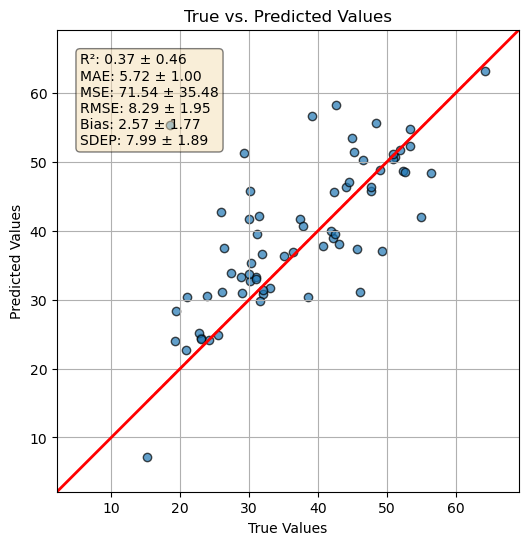

{'R²': {'mean': 0.36849991662158077, 'std': 0.4620464628518708},
 'MAE': {'mean': 5.720967547852477, 'std': 0.9954722180414043},
 'MSE': {'mean': 71.53989349552562, 'std': 35.48331753880491},
 'RMSE': {'mean': 8.28755632241112, 'std': 1.9515134975668047},
 'Bias': {'mean': 2.5731013713818798, 'std': 1.7683431633892266},
 'SDEP': {'mean': 7.985266160500752, 'std': 1.891219460805828}}

In [238]:
plot_true_vs_predicted(np.array(all_actuals), np.array(all_predictions))
# plot_true_vs_predicted(true_values, predicted_values)

## Exclude Natural DNA 

In [239]:
df_exclude_natural = df_mh_without_H[~df_mh_without_H['type'].str.contains('natural', case=False, na=False)]

selected_mh=df_exclude_natural.iloc[:, [0] + list(range(15,len(df_exclude_natural.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

In [240]:

all_predictions = []
all_actuals = []
val_index_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y_val = y2.iloc[train_index], y2.iloc[val_index]
    val_index_list.append(val_index)

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    # Apply weights
    weights = np.ones(len(y_train))
    weights[len(y1):] *= best_weight  # Apply the best weight found

    model = RandomForestRegressor()
    model.fit(X_train, y_train, sample_weight=weights)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    
    # Store predictions and actual values
    all_predictions.extend(y_val_pred)
    all_actuals.extend(y_val)

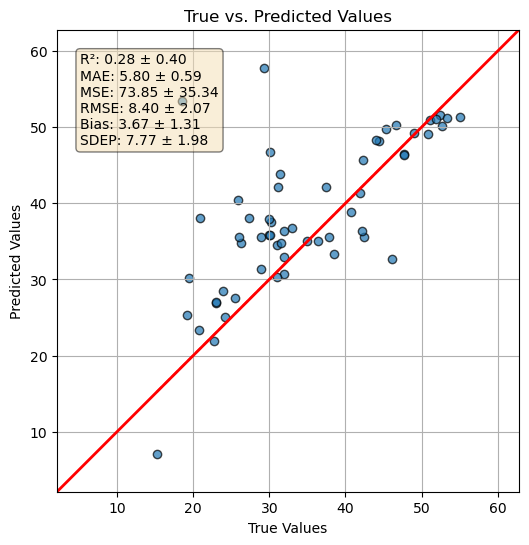

{'R²': {'mean': 0.27848767272145714, 'std': 0.39701596182344495},
 'MAE': {'mean': 5.801208062287416, 'std': 0.5857573733845254},
 'MSE': {'mean': 73.84712512867333, 'std': 35.33582783540968},
 'RMSE': {'mean': 8.404881165841232, 'std': 2.0672357442603317},
 'Bias': {'mean': 3.673654937287413, 'std': 1.3113416047295108},
 'SDEP': {'mean': 7.771115798244038, 'std': 1.9838270599872534}}

In [241]:
plot_true_vs_predicted(np.array(all_actuals), np.array(all_predictions))
# plot_true_vs_predicted(true_values, predicted_values)

### Refverse K-fold validation

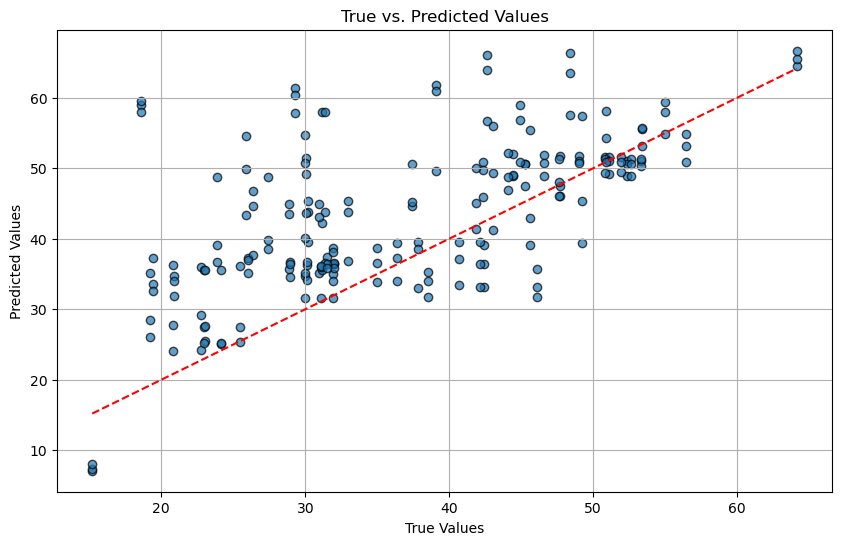

In [199]:
selected_mh=df_mh_without_H.iloc[:, [0] + list(range(15,len(df_mh_without_H.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Suppose best_weight is obtained from the experiment_with_weights function
best_weight = results['best_weight']

# Perform cross-validation with the best weight
true_values, predicted_values = cross_validate_with_best_weight(X1, y1, X2, y2, best_weight, kf)

# Plot True vs. Predicted values
plot_true_vs_predicted(true_values, predicted_values)


In [200]:
len(true_values)

207

In [ ]:
selected_mh=df_mh_without_H.iloc[:, [0] + list(range(15,len(df_mh_without_H.columns)))]
selected_lz=df_lz_without_H.iloc[:, [0] + list(range(9,len(df_lz_without_H.columns)))]
# Example usage:

# Assuming lz_extended and mh_extended are already defined
X1, X2, y1, y2, X_combined, y_combined = preprocess_datasets(selected_lz, selected_mh)

# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 250)

# Run experiment
results = experiment_with_weights(X1, y1, X2, y2, weights_range, kf)

# Access results
best_weight = results['best_weight']
best_score = results['best_score']
metrics_for_best_weight = results['metrics'][best_weight]


In [ ]:
X2 = df_mh[filtered_columns]
y2 = df_mh['Tm']
model = RandomForestRegressor()

# Train and evaluate the model with hyperparameter tuning
results = train_and_evaluate_model(X2, y2, df_type=df_mh, model=model, param_grid=param_grid)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

In [ ]:
# Filter df_hb to include only rows where the 'type' column contains the word 'natural'
df_natural = df_mh[df_mh['type'].str.contains('natural', case=False, na=False)]

# Now use the filtered DataFrame for further analysis
X2 = df_natural[df_natural.columns[:15]]
y2 = df_natural['Tm']
model = LinearRegression()

# Train and evaluate the model with hyperparameter tuning using the filtered DataFrame
results = train_and_evaluate_model(X2, y2, df_type=df_natural, model=model,n_splits=3)
metrics = plot_predictions_and_metrics(results, df_natural, name_col='Length')

Index(['Count_Y', 'C_sugar-C_sugar', 'C_sugar-O_backbone',
       'C_sugar-C_nucleobase', 'C_sugar-O_nucleobase', 'C_sugar-O_sugar',
       'C_sugar-P_backbone', 'C_sugar-N_nucleobase', 'C_sugar-H_nucleobase',
       'C_sugar-H_sugar', 'O_backbone-C_sugar', 'O_backbone-O_backbone',
       'O_backbone-C_nucleobase', 'O_backbone-O_nucleobase',
       'O_backbone-O_sugar', 'O_backbone-P_backbone',
       'O_backbone-N_nucleobase', 'O_backbone-H_nucleobase',
       'O_backbone-H_sugar', 'C_nucleobase-C_sugar', 'C_nucleobase-O_backbone',
       'C_nucleobase-C_nucleobase', 'C_nucleobase-O_nucleobase',
       'C_nucleobase-O_sugar', 'C_nucleobase-P_backbone',
       'C_nucleobase-N_nucleobase', 'C_nucleobase-H_nucleobase',
       'C_nucleobase-H_sugar', 'O_nucleobase-C_sugar',
       'O_nucleobase-O_backbone', 'O_nucleobase-C_nucleobase',
       'O_nucleobase-O_nucleobase', 'O_nucleobase-O_sugar',
       'O_nucleobase-P_backbone', 'O_nucleobase-N_nucleobase',
       'O_nucleobase-H_nucleobas

In [ ]:
# history.model.predict()
# Evaluate on validation set
val_loss = history.model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation MAE: ')

# Save the model
history.model.save('mt_cnn_model.h5')


3/3 [==============================] - 0s 21ms/step - loss: 16.8375 - mse: 16.8375 - mean_absolute_error: 3.2658 - r2_func_tf: 0.9214 - rmse_func_tf: 4.0727 - bias_func_tf: 1.4756 - sdep_func_tf: 3.7805
Validation Loss: [16.837528228759766, 16.837528228759766, 3.265846014022827, 0.9214274883270264, 4.072707653045654, 1.475584864616394, 3.7804787158966064], Validation MAE: 


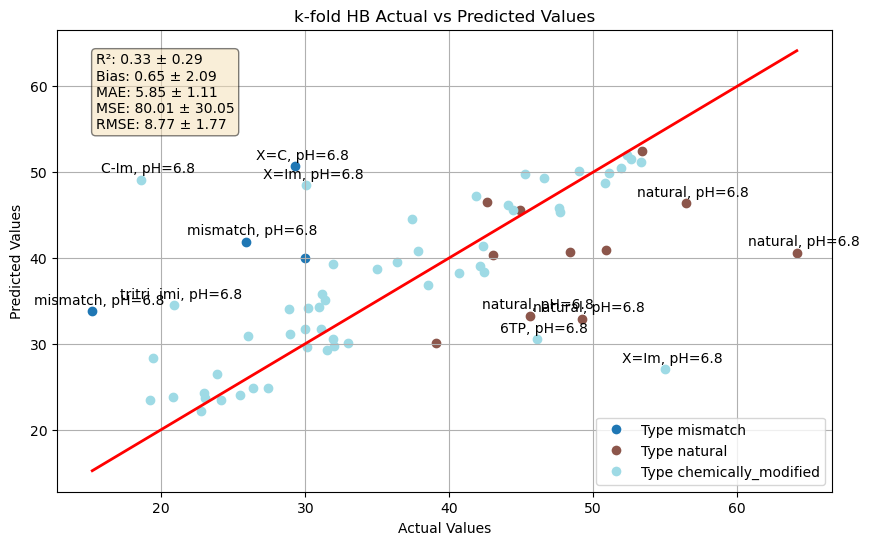

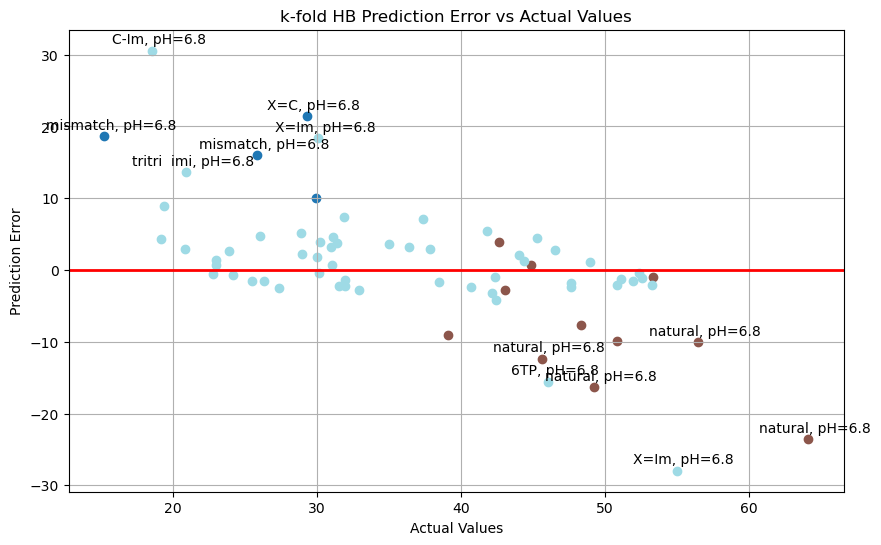

In [34]:
X2=df_mh[filtered_columns]
y2=df_mh['Tm']

model=RandomForestRegressor()
results = train_and_evaluate_model(X2, y2,model=model df_mh)
metrics = plot_predictions_and_metrics(results, df_mh, name_col='type')

In [37]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [38]:
def plot_predictions(model,x_test,y_test,correction=0,model_name="MLR",figure_name="actual_vs_predicted"):
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred-correction)
    mae = mean_absolute_error(y_test, y_pred-correction)
    r2 = r2_score(y_test, y_pred-correction)
    bias = np.mean(y_pred - y_test)

    # Calculate the slope/gradient
    # reg = LinearRegression().fit(y_test, (y_pred - correction))
    # slope = reg.coef_[0][0]

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred-correction, color='blue', label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    # Text box with metrics
    textstr = '\n'.join((
        f'R²: {r2:.2f}',
        f'Bias: {bias:.2f}',
        f'MAE: {mae:.2f}'
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    # plt.savefig(f'{figure_name}_{model_name}.png')
    plt.show()

In [72]:
X2=df[df.columns[2:]]
y2=df['Tm']

In [73]:
X_train=df[df.columns[2:]]
y_train=df['Tm']

In [74]:
# Create the Linear Regression model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# plot_predictions(model,X_train,y_train,correction=0,model_name="MLR",figure_name="actual_vs_predicted")

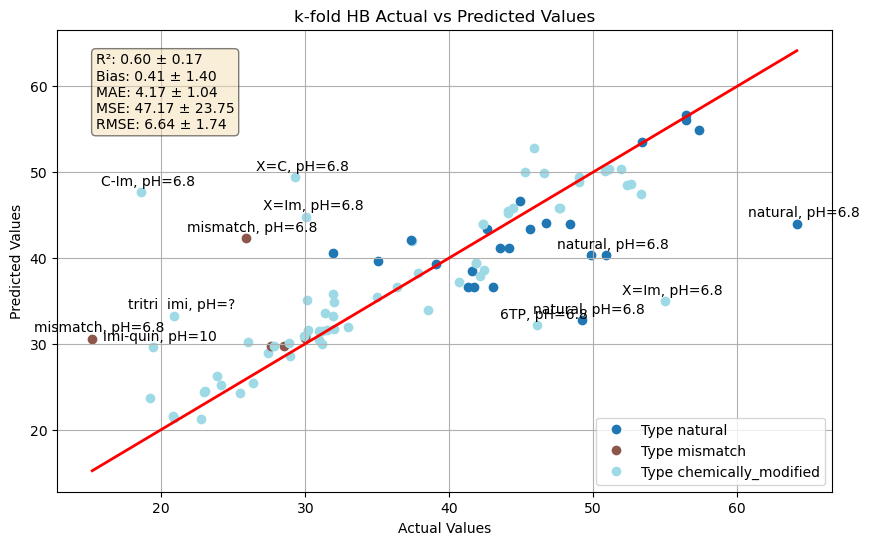

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


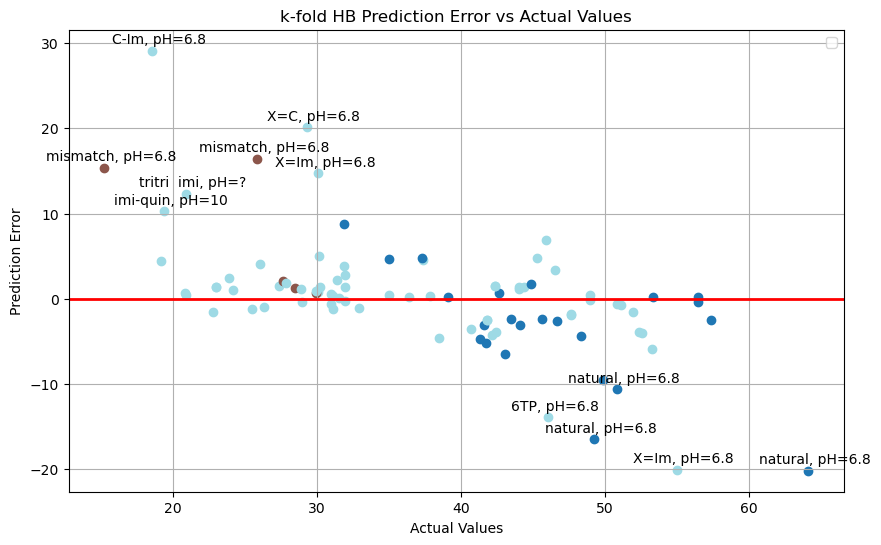

In [84]:
#  after 25th of August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_error_in_actual_value.png')
plt.show()

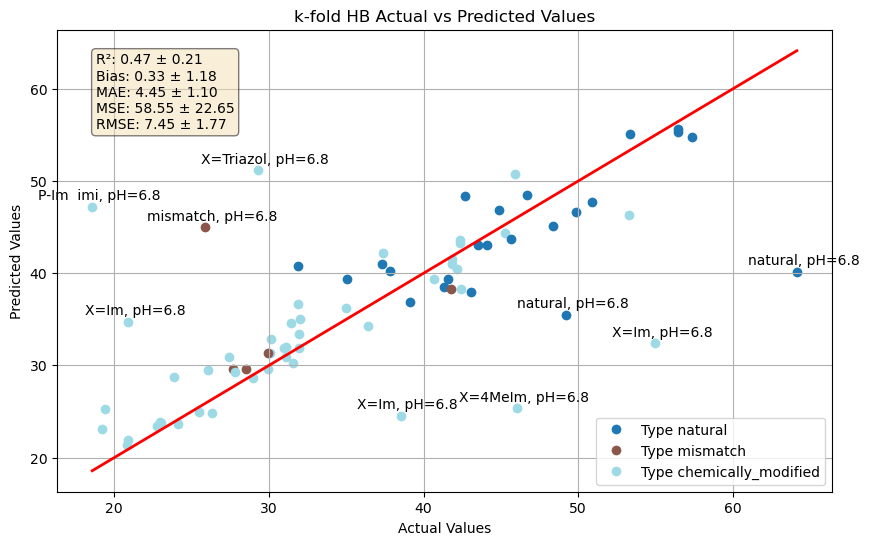

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


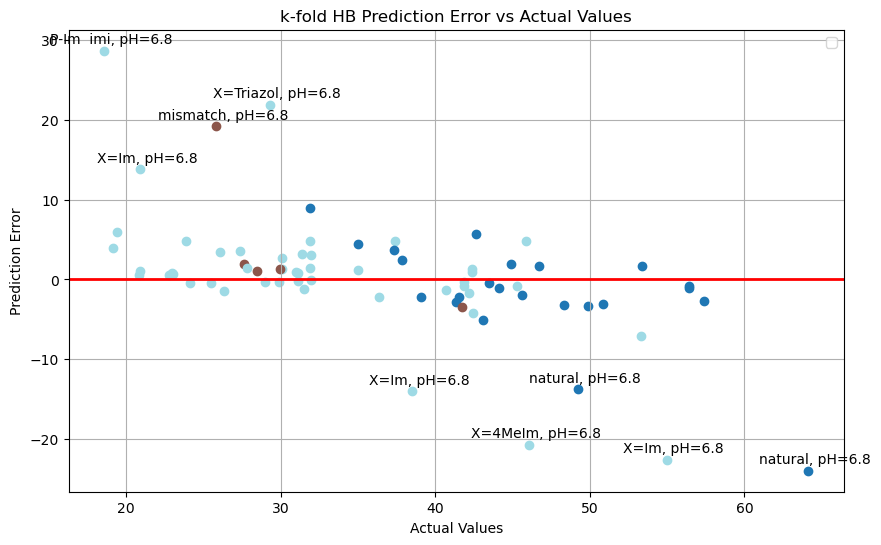

In [231]:
# before 25 August 2024
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
plt.style.use('default')

# Assuming df_type contains the 'type' and 'Nucleotide shorthand' columns

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

for train_index, val_index in kf.split(X2):
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_error_in_actual_value.png')
plt.show()

Bias: -0.11 vs -0.09 
MAE: 4.82 vs 4.81
R²: 0.37 vs 0.37


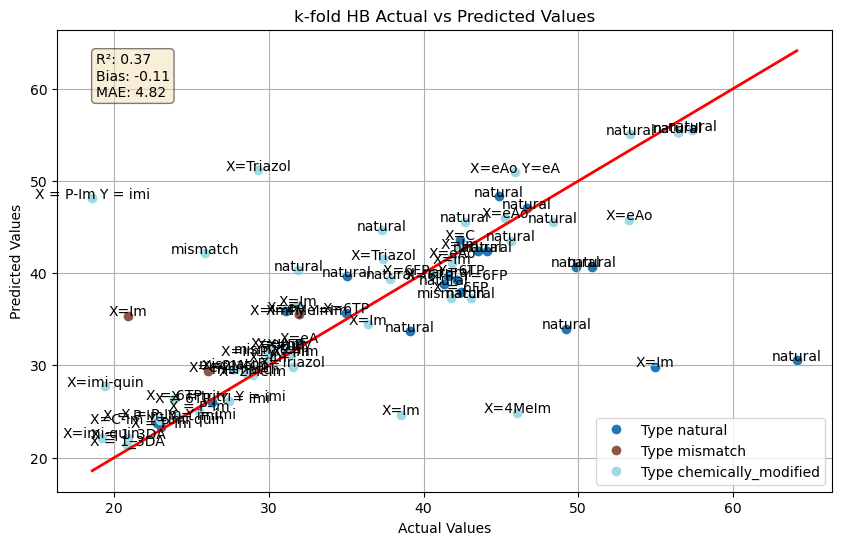

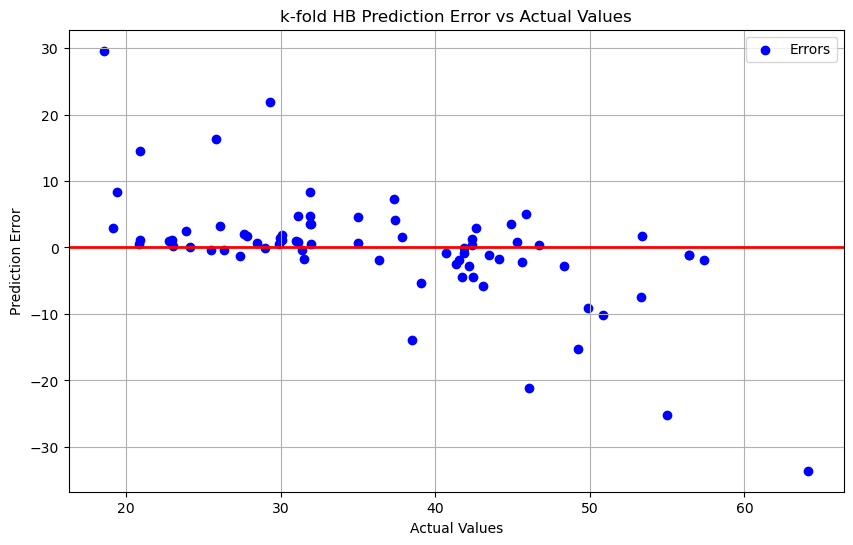

In [226]:
# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]

val_index_list=[]

for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    model = RandomForestRegressor()
    model.fit(X2_train, y2_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    val_index_list.extend(val_index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
name_col='type' #'Consensuc sequence'
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))  # Choose a colormap, tab20 can handle up to 20 colors
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

# Plot actual vs predicted values with color-coding
plt.figure(figsize=(10, 6))

# Plot with color corresponding to the values in the 'column_name' column
for i, (actual, pred, color) in enumerate(zip(actuals, predictions, colors)):
    plt.scatter(actual, pred, color=color, label=f'Type {df_type[name_col].iloc[val_index_list[i]]}' if i == 0 else "")
    plt.annotate(f'{df_type["Nucleotide shorthand"].iloc[val_index_list[i]]}',  # Label with the type
                 (actual, pred),  # Position to place the label
                 textcoords="offset points",  # Use offset for positioning
                 xytext=(0,0),  # Slight offset to the right and up
                 ha='center')  # Horizontal alignment
# Create a custom legend to show all types
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')
# plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')


plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

Weight: 1.0, Avg. MAE: 8.433962737944926, Avg. MAE1: 0.914604649687746
Weight: 56.44444444444444, Avg. MAE: 8.139299640197764, Avg. MAE1: 0.8892467017954735
Weight: 111.88888888888889, Avg. MAE: 8.263692398552628, Avg. MAE1: 0.9073542642466832
Weight: 167.33333333333331, Avg. MAE: 8.292193024030894, Avg. MAE1: 0.8942056928181119
Weight: 222.77777777777777, Avg. MAE: 8.556431016605451, Avg. MAE1: 0.8916388210382532
Weight: 278.22222222222223, Avg. MAE: 8.014473752678299, Avg. MAE1: 0.9098918918813442
Weight: 333.66666666666663, Avg. MAE: 8.219314082491584, Avg. MAE1: 0.9024206635441079
Weight: 389.1111111111111, Avg. MAE: 8.068341244588744, Avg. MAE1: 0.8952714178376284
Weight: 444.55555555555554, Avg. MAE: 8.2515795235089, Avg. MAE1: 0.9083804234972692
Weight: 500.0, Avg. MAE: 8.36442732767338, Avg. MAE1: 0.8922405103434843
Best weight: 500.0, Best Avg. MSE: 8.36442732767338,
Train: 22 Test: 66 out of 88


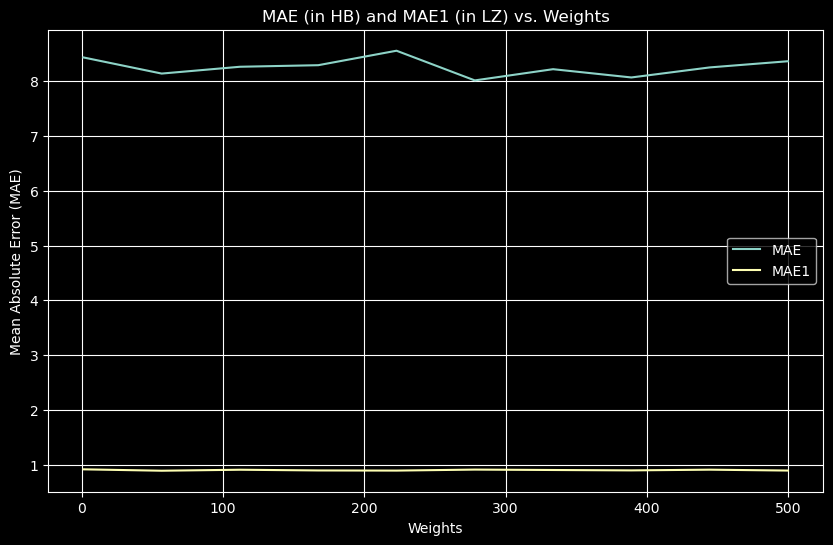

In [62]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[val_index], X2.iloc[train_index]
        y2_train, y_val = y2.iloc[val_index], y2.iloc[train_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Weight: 1.0, Avg. MAE: 5.165506802440462, Avg. MAE1: 0.9032452905932884
Weight: 56.44444444444444, Avg. MAE: 5.095316647790848, Avg. MAE1: 0.8999387724434058
Weight: 111.88888888888889, Avg. MAE: 4.974722190520863, Avg. MAE1: 0.9049855796252942
Weight: 167.33333333333331, Avg. MAE: 5.123296146734358, Avg. MAE1: 0.9106767117486352
Weight: 222.77777777777777, Avg. MAE: 5.126945793273903, Avg. MAE1: 0.8991669613583158
Weight: 278.22222222222223, Avg. MAE: 5.034812236851941, Avg. MAE1: 0.8976515124902439
Weight: 333.66666666666663, Avg. MAE: 5.259009941251838, Avg. MAE1: 0.8918355255659655
Weight: 389.1111111111111, Avg. MAE: 5.157457138156131, Avg. MAE1: 0.9088858981264654
Weight: 444.55555555555554, Avg. MAE: 5.241576060141803, Avg. MAE1: 0.8947337771272459
Weight: 500.0, Avg. MAE: 5.138421153306599, Avg. MAE1: 0.916214010798857
Best weight: 500.0, Best Avg. MSE: 5.138421153306599,
Train: 66 Test: 22 out of 88


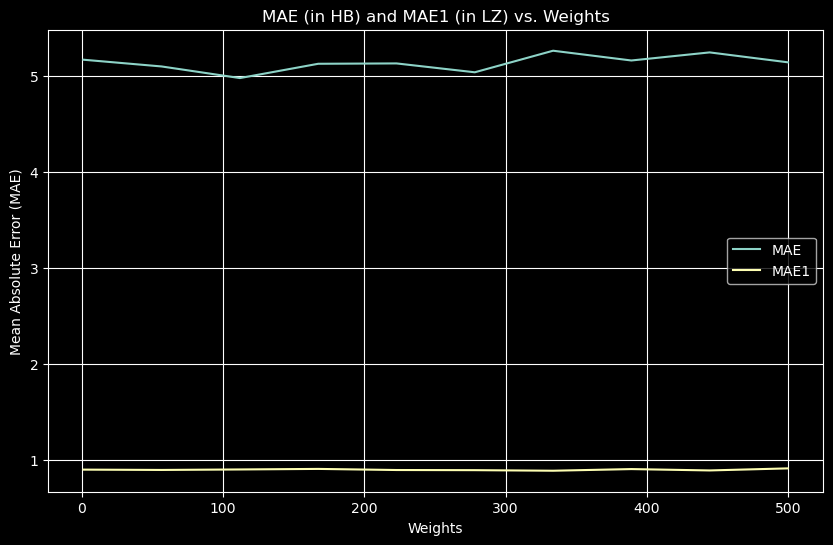

In [63]:
# Assuming X1, y1 is the first dataset and X2, y2 is the second dataset
# Combine both datasets for training

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
# y2_test=mh_extended['Tm'][r:]
# lz_extended=pd.concat([lz_original,lz_complimentary],axis=0,ignore_index=True)
# mh_extended=pd.concat([mh_original,mh_complimentary],axis=0,ignore_index=True) -->



X_combined = np.concatenate((X1, X2), axis=0)
y_combined = np.concatenate((y1, y2), axis=0)



# Define k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Define the range of weights to test
weights_range = np.linspace(1, 500, 10)

best_weight = None
best_score = float('inf')

# Lists to store weights, MAE and MAE1
weights_list = []
mae_list = []
mae1_list = []

# Cross-validate for each weight
for weight in weights_range:
    scores = []
    scores1 = []
    for train_index, val_index in kf.split(X2):
        # Use X2 for splitting and validation
        X2_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
        y2_train, y_val = y2.iloc[train_index], y2.iloc[val_index]

        # Combine X1 with the training portion of X2
        X_train = pd.concat((X1, X2_train), axis=0)
        y_train = pd.concat((y1, y2_train), axis=0)

        # Apply weights
        weights = np.ones(len(y_train))
        weights[len(y1):] *= weight  # Adjust weight for the second dataset
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train, sample_weight=weights)
        y_val_pred = model.predict(X_val)
        y_val_pred1 = model.predict(X1)
        
        score = mean_absolute_error(y_val, y_val_pred)
        score1 = mean_absolute_error(y1, y_val_pred1)
        scores.append(score)
        scores1.append(score1)
    
    avg_score = np.mean(scores)
    avg_score1 = np.mean(scores1)
    print(f"Weight: {weight}, Avg. MAE: {avg_score}, Avg. MAE1: {avg_score1}")
    
    weights_list.append(weight)
    mae_list.append(avg_score)
    mae1_list.append(avg_score1)
    
    if avg_score1 < avg_score:
        best_score = avg_score
        best_weight = weight

print(f"Best weight: {best_weight}, Best Avg. MSE: {best_score},\nTrain: {len(X2_train)} Test: {len(X_val)} out of {len(X2)}")

# Plot MAE and MAE1 against weights
plt.figure(figsize=(10, 6))
plt.plot(weights_list, mae_list, label='MAE')
plt.plot(weights_list, mae1_list, label='MAE1')
plt.xlabel('Weights')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE (in HB) and MAE1 (in LZ) vs. Weights')
plt.legend()
plt.grid(True)
plt.savefig('Weight_adjusted_training.png')
plt.show()

Bias: -0.42 vs -0.40 
MAE: 4.93 vs 4.91
R²: 0.43 vs 0.35


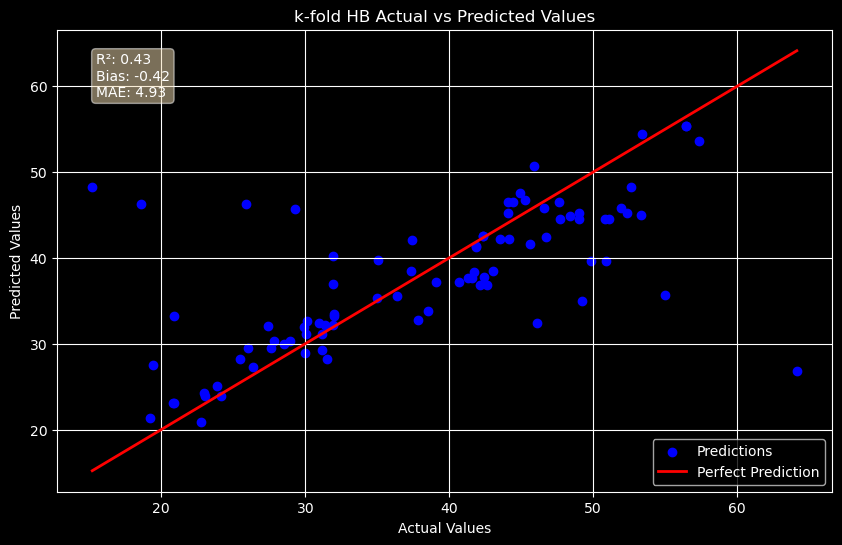

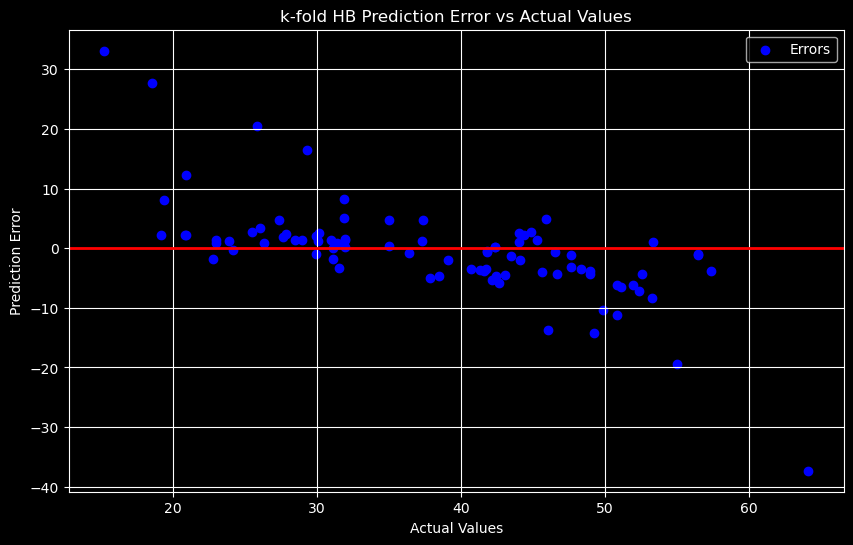

In [65]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()

    # Apply weights
    weights = np.ones(len(y_train))
    weights[len(y1):] *= weight
    model.fit(X_train, y_train,sample_weight=weights)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

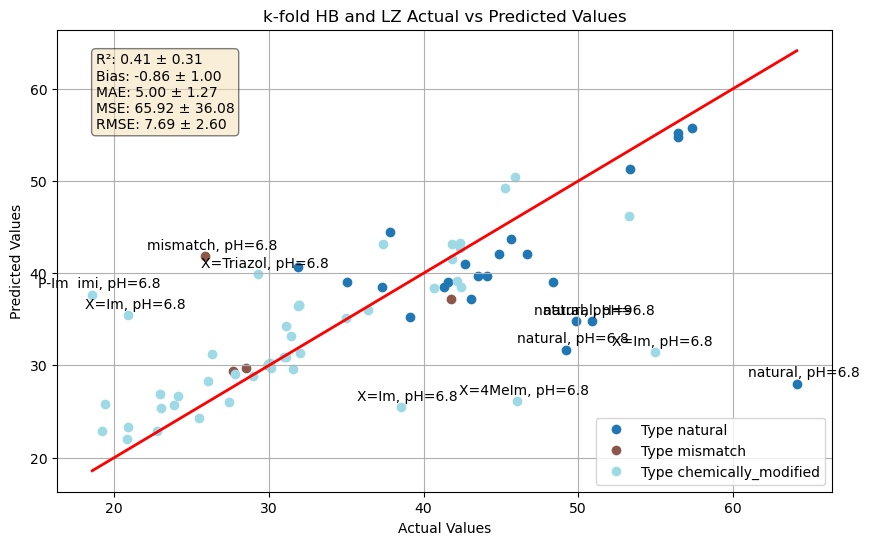

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


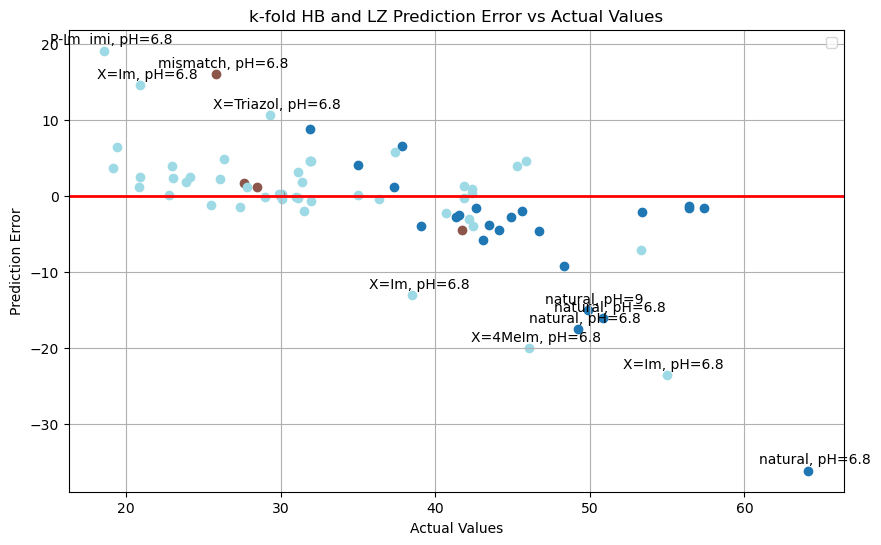

In [227]:
# Before 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
# plt.savefig(f'{name_col}_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig(f'{name_col}_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

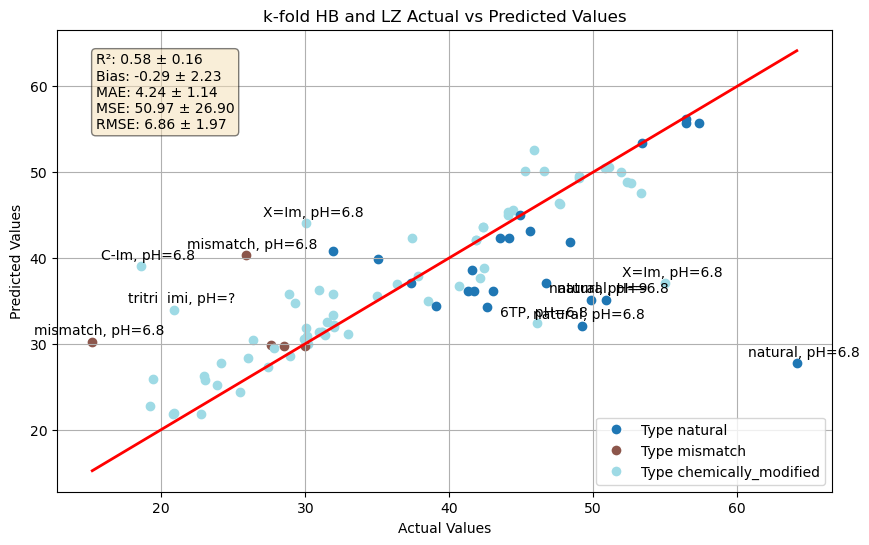

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


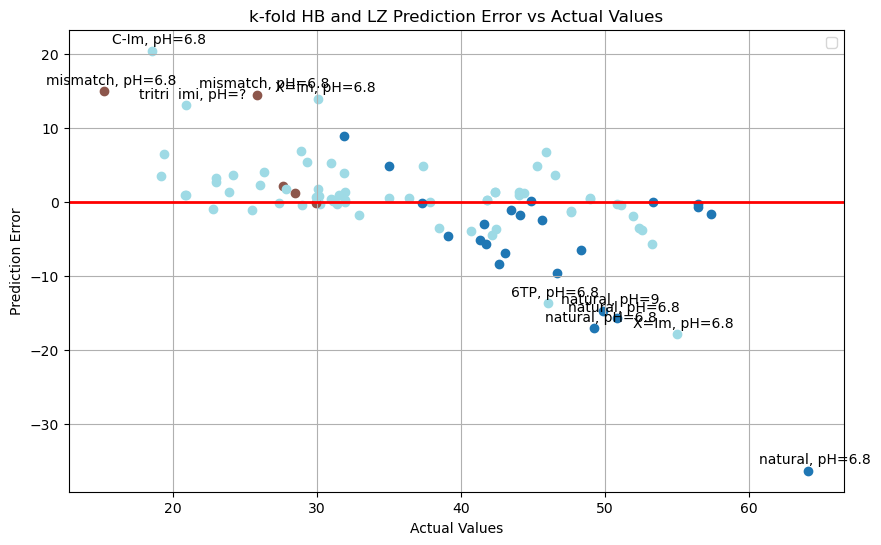

In [83]:
# after 25 August 2024
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']
weight=5000.88888888888889
for train_index, val_index in kf.split(X2):
    # Use X2 for splitting and validation
    X2_train, X2_val = X2.iloc[train_index], X2.iloc[val_index]
    y2_train, y2_val = y2.iloc[train_index], y2.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = pd.concat((X1, X2_train), axis=0)
    y_train = pd.concat((y1, y2_train), axis=0)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_type[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# Scatter plot with colors and annotations
for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, pred, color=color)
     # Check if the absolute difference is greater than 15
    if abs(actual - pred) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, pred), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')

# Perfect prediction line
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
labels = [f'Type {t}' for t in unique_types]
plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
    color = colors[idx]  # Use the original DataFrame index for color
    plt.scatter(actual, error, color=color)
     # Check if the absolute difference is greater than 15
    if np.abs(error) > 10:
        # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
        nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
        pH=f"{df_type['pH'].loc[idx]}"
        plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
                     (actual, error), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center')


# plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_EXPANDED_k-fold_HB_LZ_error_in_actual_value.png')
plt.show()

# Just a CV with both datasets

Bias: 0.09 vs 0.09 
MAE: 2.96 vs 2.96
R²: 0.84 vs 0.84


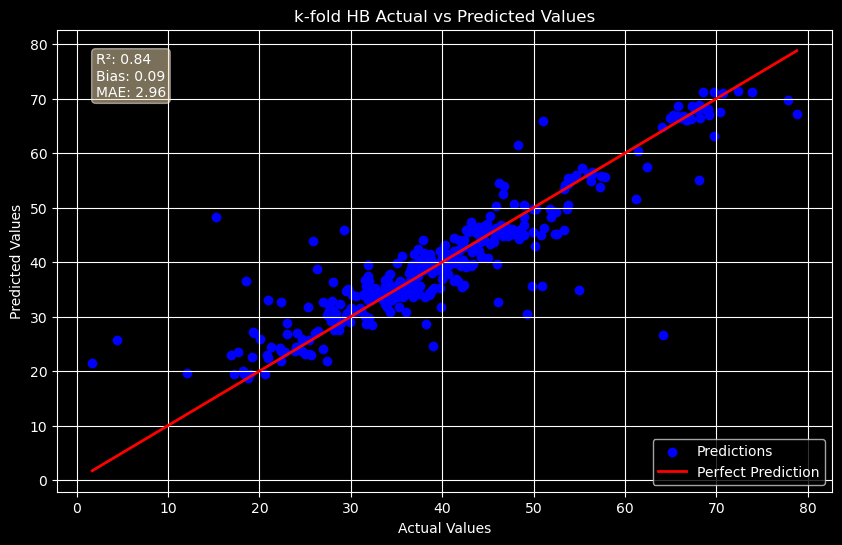

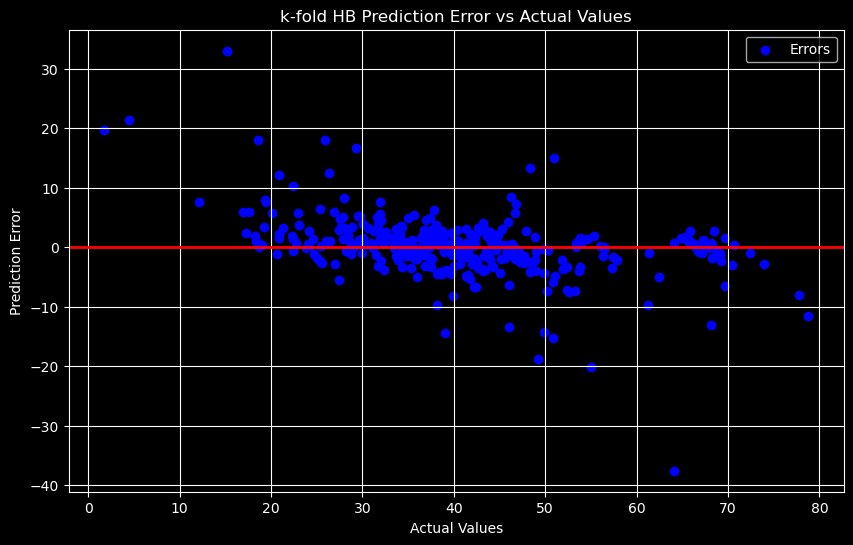

In [70]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Lists to store predictions
predictions = []
actuals = []
bias_list=[]
mae_list=[]
r2_list=[]


X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']


X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()

    # Apply weights
    # weights = np.ones(len(y_train))
    # weights[len(y1):] *= weight
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)

    bias_list.append(bias)
    mae_list.append(mae)
    r2_list.append(r2)

# Compute bias, MAE, and R²
bias = np.mean(np.array(predictions) - np.array(actuals))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Print computed metrics
print(f"Bias: {bias:.2f} vs {(sum(bias_list)/len(bias_list)):.2f} ")
print(f"MAE: {mae:.2f} vs {(sum(mae_list)/len(mae_list)):.2f}")
print(f"R²: {r2:.2f} vs {(sum(r2_list)/len(r2_list)):.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB Actual vs Predicted Values')

plt.legend(loc='lower right')
plt.grid(True)
    
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f}',
    f'Bias: {bias:.2f}',
    f'MAE: {mae:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig('k-fold_HB_actual_vs_predicted.png')
plt.show()

# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))
plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
# plt.savefig('k-fold_HB_error_in_actual_value.png')
plt.show()

In [191]:
df_lz
df
df_all=pd.concat((df, df_lz), axis=0)
df_all=df_all.reset_index(drop=True)

,Tm,C_sugar-C_sugar,C_sugar-O_backbone,C_sugar-C_nucleobase,C_sugar-O_nucleobase,C_sugar-O_sugar,C_sugar-P_backbone,C_sugar-N_nucleobase,O_backbone-C_sugar,O_backbone-O_backbone,...,P_backbone-O_sugar,P_backbone-P_backbone,P_backbone-N_nucleobase,N_nucleobase-C_sugar,N_nucleobase-O_backbone,N_nucleobase-C_nucleobase,N_nucleobase-O_nucleobase,N_nucleobase-O_sugar,N_nucleobase-P_backbone,N_nucleobase-N_nucleobase
0,35.02,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
1,31.89,680,45,981,454,359,50,688,48,2,...,29,0,54,1368,274,1709,580,700,142,920
2,25.85,677,44,975,432,359,50,712,44,4,...,29,0,57,1323,257,1622,528,675,136,919
3,64.14,1122,74,1881,470,603,86,1639,72,7,...,50,0,152,1720,291,2245,460,870,163,1732
4,49.23,677,44,1014,433,359,50,759,44,4,...,29,0,62,1323,257,1659,529,675,136,983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.57,1059,70,2076,662,559,93,1460,68,7,...,53,0,145,1715,281,3090,975,867,190,1646
84,25.47,221,5,736,310,107,23,451,5,0,...,14,0,92,782,157,2739,855,402,152,1385
85,22.97,221,5,758,310,107,23,441,5,0,...,14,0,68,776,162,2432,684,395,126,1136
86,24.14,221,5,753,310,107,23,446,5,0,...,14,0,77,780,163,2439,694,399,133,1128


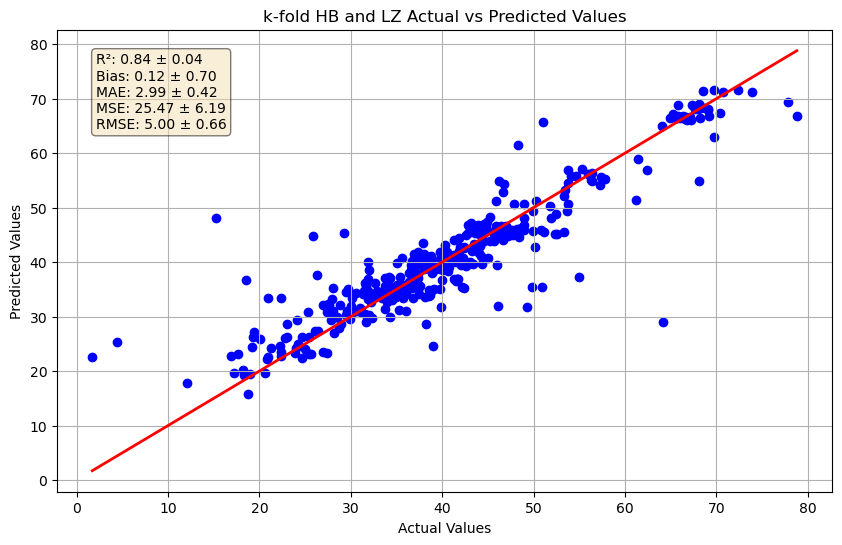

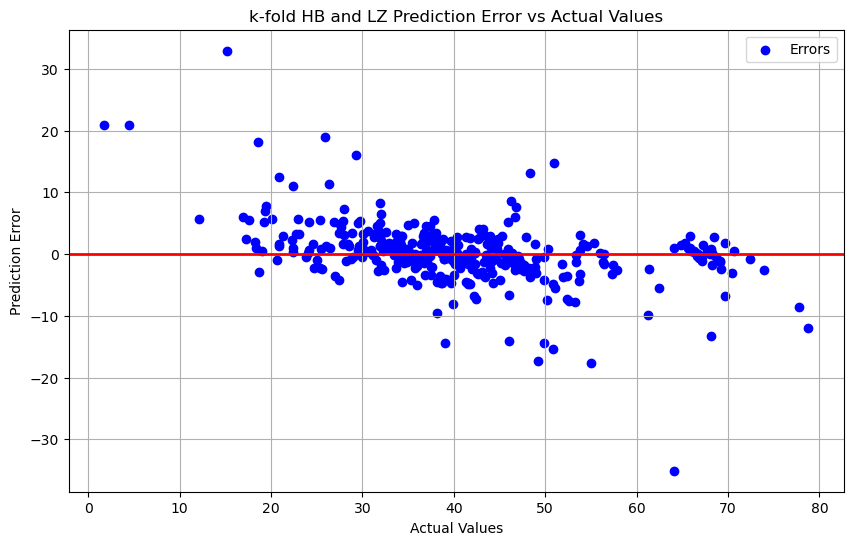

In [194]:
# Lists to store predictions, actuals, and their corresponding indices
predictions = []
actuals = []
index_list = []

bias_list = []
mae_list = []
r2_list = []
mse_list = []
rmse_list = []

X1=df_lz.iloc[:, 2:]
X2=df.iloc[:, 2:]
# X2_test=mh_extended[['a','g','c','t','len']][r:]
y1=df_lz['Tm']
y2=df['Tm']

X_all = pd.concat((X1, X2), axis=0)
y_all = pd.concat((y1, y2), axis=0)
X_all=X_all.reset_index(drop=True)
y_all=y_all.reset_index(drop=True)

for train_index, val_index in kf.split(X_all):
    # Use X2 for splitting and validation
    X2_train, X2_val = X_all.iloc[train_index], X_all.iloc[val_index]
    y2_train, y2_val = y_all.iloc[train_index], y_all.iloc[val_index]

    # Combine X1 with the training portion of X2
    X_train = X2_train
    y_train = y2_train

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    y2_val_pred = model.predict(X2_val)
    predictions.extend(y2_val_pred)
    actuals.extend(y2_val)
    index_list.extend(df_type.iloc[val_index].index)

    bias = np.mean(np.array(y2_val_pred) - np.array(y2_val))
    mae = mean_absolute_error(y2_val, y2_val_pred)
    r2 = r2_score(y2_val, y2_val_pred)
    mse = mean_squared_error(y2_val, y2_val_pred)
    rmse = mse**(1/2)
    bias_list.append(bias)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Plot actual vs predicted values
name_col = 'type' #type or Consensuc sequence
unique_types = df_all[name_col].unique()
cmap = plt.get_cmap('tab20', len(unique_types))
color_mapping = {type_: cmap(i) for i, type_ in enumerate(unique_types)}

# Assign colors based on type
colors = df_type[name_col].map(color_mapping)

plt.figure(figsize=(10, 6))

# # Scatter plot with colors and annotations
# for i, (actual, pred, idx) in enumerate(zip(actuals, predictions, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, pred, color=color)
#      # Check if the absolute difference is greater than 15
#     if abs(actual - pred) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, pred), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')

# Perfect prediction line
plt.scatter(actuals, predictions, color='blue', label='Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linewidth=2, label='Perfect Prediction')

# Custom legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=8) for i in range(len(unique_types))]
# labels = [f'Type {t}' for t in unique_types]
# plt.legend(handles, labels, loc='lower right')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-fold HB and LZ Actual vs Predicted Values')
plt.grid(True)
    

# Compute bias, MAE, and R²
bias = np.mean(bias_list)
mae = np.mean(mae_list)
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
r2 = np.mean(r2_list)

sd_bias = np.std(bias_list)
sd_mae = np.std(mae_list)
sd_mse = np.std(mse_list)
sd_rmse = np.std(rmse_list)
sd_r2 = np.std(r2_list)

plus_minus = "\u00B1"
# Text box with metrics
textstr = '\n'.join((
    f'R²: {r2:.2f} {plus_minus} {sd_r2:.2f}',
    f'Bias: {bias:.2f} {plus_minus} {sd_bias:.2f}',
    f'MAE: {mae:.2f} {plus_minus} {sd_mae:.2f}',
    f'MSE: {mse:.2f} {plus_minus} {sd_mse:.2f}',
    f'RMSE: {rmse:.2f} {plus_minus} {sd_rmse:.2f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)   
plt.savefig(f'{name_col}_CV-fold_HB_LZ_actual_vs_predicted.png')
# plt.show()
plt.show()



# Plot errors
errors = np.array(predictions) - np.array(actuals)

plt.figure(figsize=(10, 6))

# for i, (actual, error, idx) in enumerate(zip(actuals, errors, index_list)):
#     color = colors[idx]  # Use the original DataFrame index for color
#     plt.scatter(actual, error, color=color)
#      # Check if the absolute difference is greater than 15
#     if np.abs(error) > 10:
#         # Get the nucleotide shorthand and strip "X =" and "Y =" from the string
#         nucleotide_strand = df_type["Nucleotide shorthand"].loc[idx].replace("X =", "").replace("Y =", "").strip()
#         pH=f"{df_type['pH'].loc[idx]}"
#         plt.annotate(f"{nucleotide_strand}, pH={pH}",  # Annotate with the cleaned string
#                      (actual, error), 
#                      textcoords="offset points", 
#                      xytext=(5, 5), 
#                      ha='center')


plt.scatter(actuals, errors, color='blue', label='Errors')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('k-fold HB and LZ Prediction Error vs Actual Values')
plt.legend()
plt.grid(True)
plt.savefig(f'{name_col}_CV-fold_HB_LZ_error_in_actual_value.png')
plt.show()

In [72]:
df['Tm']

0     35.02
1     31.89
2     25.85
3     64.14
4     49.23
      ...  
83    18.57
84    25.47
85    22.97
86    24.14
87    23.02
Name: Tm, Length: 88, dtype: float64